# Estudio estadístico de correlación entre variables anatómicas y físicas del cáncer de pulmón.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from scipy import stats
import pingouin as pg 
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import spearmanr
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare
import re

## Exportamos los datos y los preparamos para poder trabajar con ellos.

In [3]:
df = pd.read_excel("Pulmón_IELCAP_2024_DEFINITIVO.xlsx")
#print(df.head())

Cambiamos las comas por puntos para que el programa reconozca los valores como números.

In [4]:
#df=df.replace(".",",")

Eliminamos las filas vacías y definimos la primera fila como cabecera de las columnas.

In [5]:
df.columns = df.iloc[12]
df = df.iloc[13:].reset_index(drop=True)
df


12,historia,Edad en el primer CT,Fecha Nacimiento,sexo,MALIGNO,AP,COD_AP,Estadio,COD_ESTADIO,TNM,...,Number Of Voxels,Volume (mm^3),Image mean (T100505imagen3),Image stdev (T100505imagen3),Fecha1,Label Name,Number Of Voxels,Volume (mm^3),Image mean (T100505imagen3),Image stdev (T100505imagen3)
0,301747,61,1960,1,1,ADENOCARCINOMA,1,IIA,3,T1aN1M0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,370729,61,1960,1,1,ADENOCARCINOMA,1,IB,2,T2aN0M0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T100499,73.978082,1936-07-21 00:00:00,1,0,FIBROSIS,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T100505,64,1950,1,1,ADENOESCAMOSO,1,IIB,4,T3N0M0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T100583,77,1941,1,1,ADENOCARCINOMA SÓLIDO G2,1,IA,1,T1aN0M0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,T109282,59,1952,1,0,GRANULOMA,13,NaN,NaN,benigno,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,T112270,55,1956,2,0,Benigno,16,NaN,NaN,benigno,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,T112466,63,1948,2,1,MICROCITICO,2,IIA,3,T2aN1M0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,NaN,50.336986,NaN,NaN,158,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df=df.dropna(subset=['historia'])

In [7]:
col=['Edad en el primer CT','sexo','TNM','Estadio','Cirugia','COD_AP','MALIGNO','COD_ESTADIO','Volume(mm3)1','ImageMean1','Volume(mm3)2','ImageMean2','Volume(mm3)3','ImageMean3','ImageMean4','BETA','ALFA','t1','t2','t3',"Volume(mm3)4",'Solido', 'ImageStDev1','ImageStDev2','ImageStDev3']
datos = df.set_index('historia')[col]
#datos = datos.drop(['T121473','T135099','T111281','T114112','T114119','T116348','T120752','T121473','T133465','T143635','T145749','T80515','T100982','T102394','T103486','T108367','T109282','T112270','T112466'])
#datos['sexo'] = datos['sexo'].astype(int)
datos['Cirugia'] = datos['Cirugia'].astype(bool)
datos['COD_AP'] = datos['COD_AP'].astype(int)
datos['Edad en el primer CT'] = datos['Edad en el primer CT'].astype(int)
datos['MALIGNO'] = datos['MALIGNO'].astype(bool)
#datos['COD_ESTADIO'] = datos['COD_ESTADIO'].astype(int)
datos['Volume(mm3)1'] = datos['Volume(mm3)1'].astype(float)
datos['Volume(mm3)2'] = datos['Volume(mm3)2'].astype(float)
datos['Volume(mm3)3'] = datos['Volume(mm3)3'].astype(float)
datos['Volume(mm3)4'] = datos['Volume(mm3)4'].astype(float)
datos['ImageMean1'] = datos['ImageMean1'].astype(float)
datos['ImageMean2'] = datos['ImageMean2'].astype(float)
datos['ImageMean3'] = datos['ImageMean3'].astype(float)
datos['ImageMean4'] = datos['ImageMean4'].astype(float)
datos['ImageStDev1'] = datos['ImageStDev1'].astype(float)
datos['ImageStDev2'] = datos['ImageStDev2'].astype(float)
datos['ImageStDev3'] = datos['ImageStDev3'].astype(float)
datos['BETA'] = datos['BETA'].astype(float)
datos['ALFA'] = datos['ALFA'].astype(float)
datos['t1'] = datos['t1'].astype(float)
datos['t2'] = datos['t2'].astype(float)
datos['t3'] = datos['t3'].astype(float)
datos.dtypes
datos

12,Edad en el primer CT,sexo,TNM,Estadio,Cirugia,COD_AP,MALIGNO,COD_ESTADIO,Volume(mm3)1,ImageMean1,...,BETA,ALFA,t1,t2,t3,Volume(mm3)4,Solido,ImageStDev1,ImageStDev2,ImageStDev3
historia,,,,,,,,,,,,,,,,,,,,,
301747,61,1,T1aN1M0,IIA,True,1,True,3,359.7000,-161.7197,...,-21.723399,2.117852e+56,2.666700,14.033000,NaN,NaN,0,238.5023,205.0656,226.8981
370729,61,1,T2aN0M0,IB,True,1,True,2,2016.0000,-308.4085,...,-1.814901,1.372105e+08,3.066670,12.233330,NaN,NaN,2,327.2886,285.6948,293.2280
T100499,73,1,NaN,NaN,True,12,False,NaN,140.5000,-133.1760,...,-0.971137,2.084521e+03,45.733333,57.966667,NaN,NaN,0,277.1118,292.6269,282.1420
T100505,64,1,T3N0M0,IIB,True,1,True,4,4332.7600,-852.8960,...,3.739728,2.868865e-12,12.166667,13.366667,NaN,NaN,1,234.2930,228.0830,315.8330
T100583,77,1,T1aN0M0,IA,True,1,True,1,85.7200,2.3670,...,0.630839,1.332084e-01,12.200000,34.367000,NaN,NaN,0,157.5911,157.3986,223.2795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T103486,55,2,T1aN0M0,IA,True,1,True,1,73.3273,-245.3700,...,2.246031,9.007009e-05,9.133333,21.300000,NaN,NaN,0,262.4720,216.6680,270.7530
T108367,73,1,benigno,NaN,True,13,False,NaN,76.3017,-301.1370,...,1.151409,4.038698e-02,12.166667,24.566667,NaN,NaN,0,459.2540,247.4890,307.8100
T109282,59,1,benigno,NaN,True,13,False,NaN,166.4920,1173.1000,...,2.686639,2.645054e-06,12.700000,31.333333,NaN,NaN,0,862.1180,929.7860,929.7860


In [8]:
# Definir los índices de las filas a modificar
filas_a_modificar = ["T114112", "T116348", "T143635", "T145749"]

for fila in filas_a_modificar:
    datos.loc[fila, 'ImageMean1'] = datos.loc[fila, 'ImageMean2']
    datos.loc[fila, 'ImageMean2'] = datos.loc[fila, 'ImageMean3']
    datos.loc[fila, 'ImageMean3'] = datos.loc[fila, 'ImageMean4']
    
    datos.loc[fila, 't1'] = datos.loc[fila, 't2'] - datos.loc[fila, 't1']
    datos.loc[fila, 't2'] = datos.loc[fila, 't3'] - datos.loc[fila, 't1']

    datos.loc[fila, 'Volume(mm3)1'] = datos.loc[fila, 'Volume(mm3)2']
    datos.loc[fila, 'Volume(mm3)2'] = datos.loc[fila, 'Volume(mm3)3']
    datos.loc[fila, 'Volume(mm3)3'] = datos.loc[fila, 'Volume(mm3)4']

datos = datos.drop(columns=["ImageMean4", "t3", "Volume(mm3)4"])


In [9]:
# Lista para almacenar los coeficientes a calculados
coeficientes_a = []

# Iterar sobre las filas del dataframe
for index, row in datos.iterrows():
    # Definir los valores conocidos para cada fila
    x0 = 0  # Siempre es 0
    y0 = row['ImageMean1']
    x1 = row['t1']
    y1 = row['ImageMean2']
    x2 = row['t2']
    y2 = row['ImageMean3']

    # Construir el sistema de ecuaciones lineales
    A = np.array([
        [x0**2, x0, 1],
        [x1**2, x1, 1],
        [x2**2, x2, 1]
    ])

    B = np.array([y0, y1, y2])

    # Resolver el sistema de ecuaciones lineales para obtener a, b, c
    a, b, c = np.linalg.solve(A, B)

    # Almacenar el coeficiente a calculado
    coeficientes_a.append(a)

# Añadir la lista de coeficientes a como una nueva columna al dataframe original
datos['CoefParabolAtenuacion'] = coeficientes_a

datos['MeanAt'] = datos[['ImageMean1', 'ImageMean2', 'ImageMean3']].mean(axis=1)
datos['tcambio'] = ((datos['ImageMean2'] - datos['ImageMean1']) / datos['t1']-(datos['ImageMean3'] - datos['ImageMean2']) / datos['t2'])

# Mostrar el dataframe con los coeficientes a calculados
#print(datos['tcambio'])




In [10]:
# Supongamos que ya tienes el DataFrame 'datos' cargado con las columnas 'ImageMean1', 'ImageMean2', 'ImageMean3', 't1', y 't2'

# Lista para almacenar los coeficientes a calculados
coeficientes_a = []

# Iterar sobre las filas del dataframe
for index, row in datos.iterrows():
    # Definir los valores conocidos para cada fila
    x0 = 1  # Logarithm of 0 is undefined, so we start at 1
    y0 = row['ImageMean1']
    x1 = row['t1']
    y1 = row['ImageMean2']
    x2 = row['t2']
    y2 = row['ImageMean3']

    # Construir el sistema de ecuaciones lineales para un ajuste logarítmico
    A = np.array([
        [np.log(x0), 1],
        [np.log(x1), 1],
        [np.log(x2), 1]
    ])

    B = np.array([y0, y1, y2])

    # Resolver el sistema de ecuaciones lineales para obtener a y b
    a, b = np.linalg.lstsq(A, B, rcond=None)[0]

    # Almacenar el coeficiente a calculado
    coeficientes_a.append(a)

# Añadir la lista de coeficientes a como una nueva columna al dataframe original
datos['CoefLogAtenuacion'] = coeficientes_a

# Mostrar el dataframe con la nueva columna
print(datos['CoefLogAtenuacion'])


historia
301747      -0.437397
370729      -0.712404
T100499     -2.253179
T100505      8.171867
T100583    -15.024389
              ...    
T103486     23.422275
T108367     68.318977
T109282    -20.775619
T112270     35.158026
T112466    201.735946
Name: CoefLogAtenuacion, Length: 250, dtype: float64


C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\3442913970.py:2: RuntimeWarning: invalid value encountered in log
  y1,y2= -2.5*np.log(x),10.8*np.log(x)


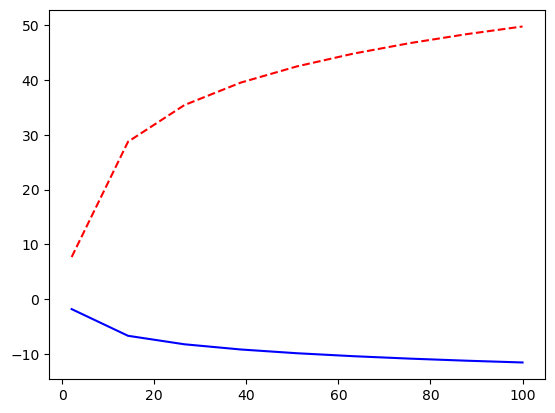

In [95]:
x = np.linspace(-500, 100)
y1,y2= -2.5*np.log(x),10.8*np.log(x)


plt.plot(x, y1, label='Sin(x)', color='b')
plt.plot(x, y2, label='Cos(x)', color='r', linestyle='--')


In [11]:
import numpy as np
import pandas as pd

# Supongamos que ya tienes el DataFrame 'datos' cargado con las columnas 'ImageMean1', 'ImageMean2', 'ImageMean3', 't1', y 't2'

# Lista para almacenar los coeficientes a calculados
coeficientes_a = []

# Iterar sobre las filas del dataframe
for index, row in datos.iterrows():
    # Definir los valores conocidos para cada fila
    x0 = 0
    y0 = row['ImageMean1']
    x1 = row['t1']
    y1 = row['ImageMean2']
    x2 = row['t2']
    y2 = row['ImageMean3']

    # Construir el sistema de ecuaciones lineales para un ajuste lineal
    A = np.array([
        [x0, 1],
        [x1, 1],
        [x2, 1]
    ])

    B = np.array([y0, y1, y2])

    # Resolver el sistema de ecuaciones lineales para obtener a y b
    a, b = np.linalg.lstsq(A, B, rcond=None)[0]

    # Almacenar el coeficiente a calculado
    coeficientes_a.append(a)

# Añadir la lista de coeficientes a como una nueva columna al dataframe original
datos['CoefLinearAtenuacion'] = coeficientes_a

# Mostrar el dataframe con la nueva columna
print(datos['CoefLinearAtenuacion'])

historia
301747     -1.193683
370729      1.183776
T100499    -0.102373
T100505     1.851056
T100583    -2.330452
             ...    
T103486     3.005296
T108367     8.835140
T109282    -1.962823
T112270     6.977476
T112466    38.797491
Name: CoefLinearAtenuacion, Length: 250, dtype: float64


In [12]:
benignos=datos[datos.MALIGNO==False]

malignos=datos[datos.MALIGNO==True]
malignos['Estadio'] = malignos['Estadio'].replace({
    'IA': 'I', 'IB': 'I', 'IIA': 'II', 'IIB': 'II', 'IIIA': 'III', 'IIIB': 'III', 'IVA': 'IV'
})

benignos.dropna(axis=1, how='all',inplace=True)
malignos.dropna(axis=1, how='all',inplace=True)

malignos_num = malignos.select_dtypes(include=['float'])
benignos_num=benignos.select_dtypes(include=['float'])
malignos.to_excel('malignos.xlsx')
datos.to_excel('datos.xlsx')

C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\1361775377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malignos['Estadio'] = malignos['Estadio'].replace({
C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\1361775377.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benignos.dropna(axis=1, how='all',inplace=True)
C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\1361775377.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

# Estudio sólido

## Todos juntos

In [13]:
solido = datos
solido = solido.dropna(subset=['Solido'])
solido['Solido'] = solido['Solido'].astype(float)
solido['ImageStDev1'] = solido['ImageStDev1'].astype(float)
solido['ImageStDev3'] = solido['ImageStDev3'].astype(float)

C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\4205706440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solido['Solido'] = solido['Solido'].astype(float)
C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\4205706440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solido['ImageStDev1'] = solido['ImageStDev1'].astype(float)
C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\4205706440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

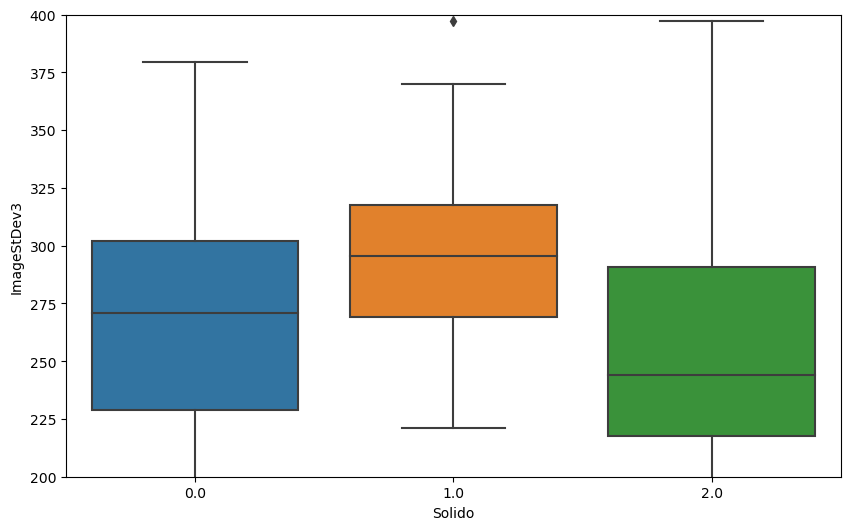

In [14]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='Solido', y='ImageStDev3', data=solido)
ax.set_ylim(200, 400)
plt.show()

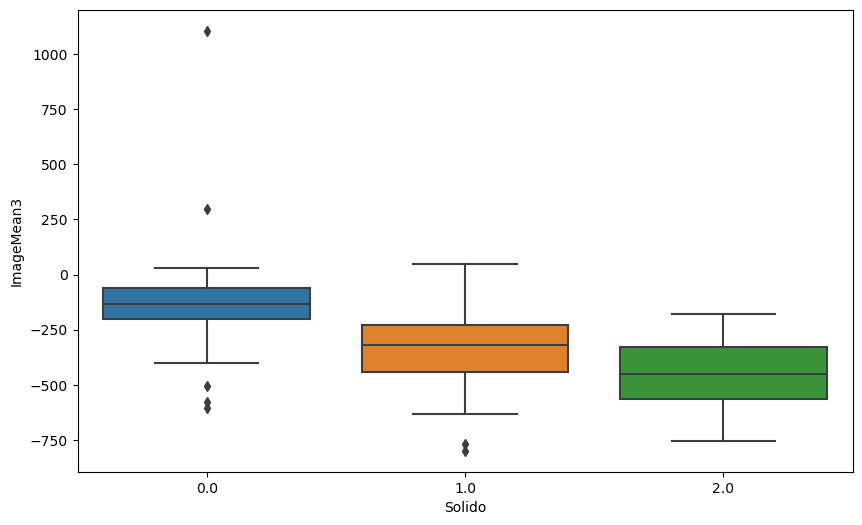

In [15]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='Solido', y='ImageMean3', data=solido)
#ax.set_ylim(200, 400)
plt.show()

In [16]:
import pandas as pd
import numpy as np

# Supongamos que 'datos' y 'solido' son tus dataframes

# Calcular las estadísticas para cada tipo de tumor en el dataframe 'solido'
statistics = solido.groupby('Solido').agg({
    'ImageMean3': ['mean', 'std'],
    'ImageStDev3': ['mean', 'std'],
    'ImageMean1': ['mean', 'std'],
    'ImageStDev1': ['mean', 'std'],
    'ImageMean2': ['mean', 'std'],
    'ImageStDev2': ['mean', 'std']
}).reset_index()

statistics.columns = [
    'Solido', 'Mean_ImageMean3', 'Std_ImageMean3', 'Mean_ImageStDev3', 'Std_ImageStDev3',
    'Mean_ImageMean1', 'Std_ImageMean1', 'Mean_ImageStDev1', 'Std_ImageStDev1',
    'Mean_ImageMean2', 'Std_ImageMean2', 'Mean_ImageStDev2', 'Std_ImageStDev2'
]

# Definir una función para determinar el tipo de tumor más probable
def most_probable_tumor(row, statistics):
    min_distance = float('inf')
    probable_tumor = None
    
    for _, stats in statistics.iterrows():
        try:
            distance = (
                (2*(row['ImageMean3'] - stats['Mean_ImageMean3']) / stats['Std_ImageMean3'])**2 +
                (2*(row['ImageStDev3'] - stats['Mean_ImageStDev3']) / stats['Std_ImageStDev3'])**2 +
                ((row['ImageMean1'] - stats['Mean_ImageMean1']) / stats['Std_ImageMean1'])**2 +
                ((row['ImageStDev1'] - stats['Mean_ImageStDev1']) / stats['Std_ImageStDev1'])**2 +
                ((row['ImageMean2'] - stats['Mean_ImageMean2']) / stats['Std_ImageMean2'])**2 +
                ((row['ImageStDev2'] - stats['Mean_ImageStDev2']) / stats['Std_ImageStDev2'])**2
            ) ** 0.5
        except KeyError as e:
            print(f"KeyError: {e}")
            continue

        if distance < min_distance:
            min_distance = distance
            probable_tumor = stats['Solido']
    
    return probable_tumor



# Aplicar la función a cada fila en el dataframe 'datos', ignorando las filas con NaNs
datos_cleaned = datos.dropna(subset=['ImageMean3', 'ImageStDev3', 'ImageMean1', 'ImageStDev1', 'ImageMean2', 'ImageStDev2'])
datos['Solidestimated'] = datos_cleaned.apply(lambda row: most_probable_tumor(row, statistics), axis=1)

# Seleccionar solo las columnas 'Solidestimated' y 'Solido'
result = datos[['Solidestimated', 'Solido']]

# Identificar y mostrar los elementos diferentes, ignorando NaNs
different_elements = result.loc[result['Solidestimated'] != result['Solido']]
different_elements.dropna(inplace=True)

equal_count = result.dropna().apply(lambda row: row['Solidestimated'] == row['Solido'], axis=1).sum()
different_count = result.dropna().apply(lambda row: row['Solidestimated'] != row['Solido'], axis=1).sum()

print(f"Porcentaje acierto: {equal_count/(equal_count+different_count)*100}")
# Mostrar los resultados
print(f"Elementos iguales: {equal_count}")
print(f"Elementos diferentes: {different_count}")

# Mostrar los elementos diferentes y sus valores de 'Solid' y 'Solidestimated'
print(different_elements)


Porcentaje acierto: 74.3455497382199
Elementos iguales: 142
Elementos diferentes: 49
12         Solidestimated Solido
historia                        
370729                1.0      2
T102591               0.0      1
T104285               1.0      2
T104885               1.0      2
T105054               2.0      1
T105620               1.0      2
T106010               1.0      0
T108262               0.0      1
T111843               1.0      0
T112038-1             0.0      1
T112135               2.0      0
T112438               2.0      1
T113676               1.0      0
T113953               1.0      2
T115563               0.0      1
T116825               0.0      1
T124289               1.0      0
T125016               1.0      2
T126239               1.0      0
T127594               0.0      2
T128416               0.0      1
T131776               1.0      0
T132975               0.0      1
T135247               2.0      1
T136480               1.0      0
T136629               0.

C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\3578892361.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different_elements.dropna(inplace=True)


In [17]:
139/(139+52)*100

72.77486910994764

In [18]:
# Contar los errores clasificados por 'Solidestimated' y 'Solido'
error_counts = different_elements.groupby(['Solidestimated', 'Solido']).size().reset_index(name='Count')

# Mostrar los errores clasificados y sus conteos
print(error_counts)

   Solidestimated  Solido  Count
0             0.0       1     14
1             0.0       2      5
2             1.0       0      9
3             1.0       2     10
4             2.0       0      4
5             2.0       1      7


In [19]:
error_counts = datos.groupby(['MALIGNO', 'Solido']).size().reset_index(name='Count')
error_counts


,MALIGNO,Solido,Count
0,False,0,38
1,False,1,3
2,False,2,2
3,True,0,78
4,True,1,34
5,True,2,36


## Malignos y benignos por separado

In [20]:
solidob = benignos
solidob = benignos.dropna(subset=['Solido'])
solidob['Solido'] = solidob['Solido'].astype(float)
solidob['ImageStDev1'] = solidob['ImageStDev1'].astype(float)

C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\4214607090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solidob['Solido'] = solidob['Solido'].astype(float)
C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\4214607090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solidob['ImageStDev1'] = solidob['ImageStDev1'].astype(float)


In [21]:

# Calcular las estadísticas para cada tipo de tumor en el dataframe 'solido'
statistics = solido.groupby('Solido').agg({
    'ImageMean3': ['mean', 'std'],
    'ImageStDev3': ['mean', 'std'],
    'ImageMean1': ['mean', 'std'],
    'ImageStDev1': ['mean', 'std'],
    'ImageMean2': ['mean', 'std'],
    'ImageStDev2': ['mean', 'std']
}).reset_index()

statistics.columns = [
    'Solido', 'Mean_ImageMean3', 'Std_ImageMean3', 'Mean_ImageStDev3', 'Std_ImageStDev3',
    'Mean_ImageMean1', 'Std_ImageMean1', 'Mean_ImageStDev1', 'Std_ImageStDev1',
    'Mean_ImageMean2', 'Std_ImageMean2', 'Mean_ImageStDev2', 'Std_ImageStDev2'
]

# Definir una función para determinar el tipo de tumor más probable
def most_probable_tumor(row, statistics):
    min_distance = float('inf')
    probable_tumor = None
    
    for _, stats in statistics.iterrows():
        try:
            distance = (
                ((row['ImageMean3'] - stats['Mean_ImageMean3']) / stats['Std_ImageMean3'])**2 +
                ((row['ImageStDev3'] - stats['Mean_ImageStDev3']) / stats['Std_ImageStDev3'])**2 +
                ((row['ImageMean1'] - stats['Mean_ImageMean1']) / stats['Std_ImageMean1'])**2 +
                ((row['ImageStDev1'] - stats['Mean_ImageStDev1']) / stats['Std_ImageStDev1'])**2 +
                ((row['ImageMean2'] - stats['Mean_ImageMean2']) / stats['Std_ImageMean2'])**2 +
                ((row['ImageStDev2'] - stats['Mean_ImageStDev2']) / stats['Std_ImageStDev2'])**2
            ) ** 0.5
        except KeyError as e:
            print(f"KeyError: {e}")
            continue

        if distance < min_distance:
            min_distance = distance
            probable_tumor = stats['Solido']
    
    return probable_tumor



# Aplicar la función a cada fila en el dataframe 'datos', ignorando las filas con NaNs
datos_cleaned = benignos.dropna(subset=['ImageMean3', 'ImageStDev3', 'ImageMean1', 'ImageStDev1', 'ImageMean2', 'ImageStDev2'])
benignos['Solidestimated'] = datos_cleaned.apply(lambda row: most_probable_tumor(row, statistics), axis=1)

# Seleccionar solo las columnas 'Solidestimated' y 'Solido'
resultb = benignos[['Solidestimated', 'Solido']]

# Identificar y mostrar los elementos diferentes, ignorando NaNs
different_elementsb = resultb.loc[resultb['Solidestimated'] != resultb['Solido']]
different_elementsb.dropna(inplace=True)

resultbd=resultb.dropna()

equal_countb = resultbd.apply(lambda row: row['Solidestimated'] == row['Solido'], axis=1).sum()
different_countb = resultbd.apply(lambda row: row['Solidestimated'] != row['Solido'], axis=1).sum()

print(f"Porcentaje acierto: {equal_countb/(equal_countb+different_countb)*100}")
# Mostrar los resultados
print(f"Elementos iguales: {equal_countb}")
print(f"Elementos diferentes: {different_countb}")

# Mostrar los elementos diferentes y sus valores de 'Solid' y 'Solidestimated'
print(different_elementsb)


Porcentaje acierto: 90.69767441860465
Elementos iguales: 39
Elementos diferentes: 4
12        Solidestimated Solido
historia                       
T112135              2.0      0
T142754              0.0      1
T116348              0.0      2
T112270              0.0      1


C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\596377374.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benignos['Solidestimated'] = datos_cleaned.apply(lambda row: most_probable_tumor(row, statistics), axis=1)
C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\596377374.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different_elementsb.dropna(inplace=True)


In [22]:
39/(39+4)*100

90.69767441860465

In [23]:
solidom = malignos.dropna(subset=['Solido'])
solidom['Solido'] = solidom['Solido'].astype(float)
solidom['ImageStDev1'] = solidom['ImageStDev1'].astype(float)

C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\2745107928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solidom['Solido'] = solidom['Solido'].astype(float)
C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\2745107928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solidom['ImageStDev1'] = solidom['ImageStDev1'].astype(float)


In [24]:

# Calcular las estadísticas para cada tipo de tumor en el dataframe 'solido'
statistics = solidom.groupby('Solido').agg({
    'ImageMean3': ['mean', 'std'],
    'ImageStDev3': ['mean', 'std'],
    'ImageMean1': ['mean', 'std'],
    'ImageStDev1': ['mean', 'std'],
    'ImageMean2': ['mean', 'std'],
    'ImageStDev2': ['mean', 'std']
}).reset_index()

statistics.columns = [
    'Solido', 'Mean_ImageMean3', 'Std_ImageMean3', 'Mean_ImageStDev3', 'Std_ImageStDev3',
    'Mean_ImageMean1', 'Std_ImageMean1', 'Mean_ImageStDev1', 'Std_ImageStDev1',
    'Mean_ImageMean2', 'Std_ImageMean2', 'Mean_ImageStDev2', 'Std_ImageStDev2'
]


# Definir una función para determinar el tipo de tumor más probable
def most_probable_tumor(row, statistics):
    min_distance = float('inf')
    probable_tumor = None
    
    for _, stats in statistics.iterrows():
        try:
            distance = (
                (2*(row['ImageMean3'] - stats['Mean_ImageMean3']) / stats['Std_ImageMean3'])**2 +
                (2*(row['ImageStDev3'] - stats['Mean_ImageStDev3']) / stats['Std_ImageStDev3'])**2 +
                ((row['ImageMean1'] - stats['Mean_ImageMean1']) / stats['Std_ImageMean1'])**2 +
                ((row['ImageStDev1'] - stats['Mean_ImageStDev1']) / stats['Std_ImageStDev1'])**2 +
                ((row['ImageMean2'] - stats['Mean_ImageMean2']) / stats['Std_ImageMean2'])**2 +
                ((row['ImageStDev2'] - stats['Mean_ImageStDev2']) / stats['Std_ImageStDev2'])**2
            ) ** 0.5
        except KeyError as e:
            print(f"KeyError: {e}")
            continue

        if distance < min_distance:
            min_distance = distance
            probable_tumor = stats['Solido']
    
    return probable_tumor
# Aplicar la función a cada fila en el dataframe 'datos', ignorando las filas con NaNs
datos_cleanedm = malignos.dropna(subset=['ImageMean3', 'ImageStDev3', 'ImageMean1', 'ImageStDev1', 'ImageMean2', 'ImageStDev2'])
malignos['Solidestimated'] = datos_cleanedm.apply(lambda row: most_probable_tumor(row, statistics), axis=1)

# Seleccionar solo las columnas 'Solidestimated' y 'Solido'
resultm = malignos[['Solidestimated', 'Solido']]

# Identificar y mostrar los elementos diferentes, ignorando NaNs
different_elementsm = resultm.loc[resultm['Solidestimated'] != resultm['Solido']]
different_elementsm.dropna(inplace=True)

resultmd=resultm.dropna()

equal_countm = resultmd.apply(lambda row: row['Solidestimated'] == row['Solido'], axis=1).sum()
different_countm = resultmd.apply(lambda row: row['Solidestimated'] != row['Solido'], axis=1).sum()

print(f"Porcentaje acierto: {equal_countm/(equal_countm+different_countm)*100}")
# Mostrar los resultados
print(f"Elementos iguales: {equal_countm}")
print(f"Elementos diferentes: {different_countm}")

# Mostrar los elementos diferentes y sus valores de 'Solid' y 'Solidestimated'
print(different_elementsm)

C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\846485469.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malignos['Solidestimated'] = datos_cleanedm.apply(lambda row: most_probable_tumor(row, statistics), axis=1)
C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\846485469.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different_elementsm.dropna(inplace=True)


Porcentaje acierto: 70.27027027027027
Elementos iguales: 104
Elementos diferentes: 44
12         Solidestimated Solido
historia                        
370729                1.0      2
T102591               0.0      1
T104285               1.0      2
T104885               1.0      2
T105054               2.0      1
T105620               1.0      2
T106010               1.0      0
T108262               0.0      1
T111843               1.0      0
T112038-1             0.0      1
T112438               2.0      1
T113676               1.0      0
T113953               1.0      2
T116825               0.0      1
T120810               0.0      1
T124289               1.0      0
T125016               1.0      2
T126239               1.0      0
T127594               0.0      2
T128416               0.0      1
T131776               1.0      0
T132975               0.0      1
T135247               2.0      1
T136480               1.0      0
T136629               0.0      2
T136710               1

In [25]:
# Contar los errores clasificados por 'Solidestimated' y 'Solido'
error_countsm = different_elementsm.groupby(['Solidestimated', 'Solido']).size().reset_index(name='Count')

# Mostrar los errores clasificados y sus conteos
print(error_countsm)

   Solidestimated  Solido  Count
0             0.0       1     12
1             0.0       2      4
2             1.0       0     10
3             1.0       2     10
4             2.0       0      3
5             2.0       1      5


In [26]:
101/(101+47)*100

68.24324324324324

# Estudiamos si se trata de variables paramétricas o no paramétricas

In [27]:
# Inicializar un diccionario para almacenar los resultados
resultados_shapiro = {}

# Realizar la prueba de Shapiro-Wilk para cada columna
for columna in malignos_num.columns:
    estadistico, p_valor = shapiro(malignos_num[columna])
    resultados_shapiro[columna] = p_valor

# Mostrar los valores p
print("Valores p de la prueba de Shapiro-Wilk para cada columna:")
for columna, p_valor in resultados_shapiro.items():
    print(f"{columna}: p-valor = {p_valor}")

# Determinar si alguna columna es gaussiana (p-valor > 0.05 típicamente indica normalidad)
columnas_gaussianas = [columna for columna, p_valor in resultados_shapiro.items() if p_valor > 0.05]

if columnas_gaussianas:
    print("\nColumnas que son normalmente distribuidas (Gaussianas):")
    print(columnas_gaussianas)
else:
    print("\nNo hay columnas que sean normalmente distribuidas (Gaussianas).")

Valores p de la prueba de Shapiro-Wilk para cada columna:
Volume(mm3)1: p-valor = 2.3420950532153458e-23
ImageMean1: p-valor = 0.15169459581375122
Volume(mm3)2: p-valor = 3.2958982224658586e-22
ImageMean2: p-valor = 0.00036187763907946646
Volume(mm3)3: p-valor = 2.9596378933789197e-21
ImageMean3: p-valor = 0.0008012108155526221
BETA: p-valor = 9.496411577267537e-27
ALFA: p-valor = 1.0
t1: p-valor = 8.077623292468417e-11
t2: p-valor = 3.0664823498227634e-06
ImageStDev1: p-valor = 7.052675717739154e-12
ImageStDev2: p-valor = 7.490189801728775e-08
ImageStDev3: p-valor = 1.6515731102810494e-15
CoefParabolAtenuacion: p-valor = 1.8143007929349864e-11
MeanAt: p-valor = 0.00835365243256092
tcambio: p-valor = 3.8104866484367506e-12
CoefLogAtenuacion: p-valor = 2.7252140100131328e-08
CoefLinearAtenuacion: p-valor = 4.316718094088401e-09

Columnas que son normalmente distribuidas (Gaussianas):
['ImageMean1', 'ALFA']


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1877: RuntimeWarning: overflow encountered in cast
  a, w, pw, ifault = _statlib.swilk(y, a[:N//2], init)


Puesto que no tiene sentido físico que ImageMean1 sea paramétrica cuando ni ImageMean2 ni ImageMean3 lo son, trataremos todas las variables como no paramétricas.

Realizamos el mismo test para los tumores benignos.

In [28]:
# Inicializar un diccionario para almacenar los resultados
resultados_shapiro = {}

# Realizar la prueba de Shapiro-Wilk para cada columna
for columna in benignos_num.columns:
    estadistico, p_valor = shapiro(benignos_num[columna])
    resultados_shapiro[columna] = p_valor

# Mostrar los valores p
print("Valores p de la prueba de Shapiro-Wilk para cada columna:")
for columna, p_valor in resultados_shapiro.items():
    print(f"{columna}: p-valor = {p_valor}")

# Determinar si alguna columna es gaussiana (p-valor > 0.05 típicamente indica normalidad)
columnas_gaussianas = [columna for columna, p_valor in resultados_shapiro.items() if p_valor > 0.05]

if columnas_gaussianas:
    print("\nColumnas que son normalmente distribuidas (Gaussianas):")
    print(columnas_gaussianas)
else:
    print("\nNo hay columnas que sean normalmente distribuidas (Gaussianas).")

Valores p de la prueba de Shapiro-Wilk para cada columna:
Volume(mm3)1: p-valor = 4.615314478251947e-14
ImageMean1: p-valor = 2.9124574280059434e-11
Volume(mm3)2: p-valor = 2.7979971584015523e-14
ImageMean2: p-valor = 8.54489482643439e-12
Volume(mm3)3: p-valor = 8.675718021593226e-15
ImageMean3: p-valor = 3.217769453667252e-11
BETA: p-valor = 7.577358879240492e-14
ALFA: p-valor = 1.0
t1: p-valor = 5.0043794885823445e-08
t2: p-valor = 2.8768741685780697e-05
ImageStDev1: p-valor = 6.181091337549571e-13
ImageStDev2: p-valor = 7.457997198599079e-15
ImageStDev3: p-valor = 1.1058514537030592e-13
CoefParabolAtenuacion: p-valor = 8.00355807032423e-18
MeanAt: p-valor = 5.919464137610353e-12
tcambio: p-valor = 1.9329118383995536e-13
CoefLogAtenuacion: p-valor = 1.152348507414691e-12
CoefLinearAtenuacion: p-valor = 2.027964384962444e-12

Columnas que son normalmente distribuidas (Gaussianas):
['ALFA']


Emplearemos tests no paramétricos para estudiar la correlación entre nódulos benignos y malignos.

# Mann-Whitney

In [29]:
def mann_whitney_test(df, group_col, value_col):
    unique_groups = df[group_col].unique()
    results = {}
    
    # Realizar el test de Mann-Whitney para cada par de grupos
    for i in range(len(unique_groups)):
        for j in range(i + 1, len(unique_groups)):
            group1 = unique_groups[i]
            group2 = unique_groups[j]
            group1_data = df[df[group_col] == group1][value_col]
            group2_data = df[df[group_col] == group2][value_col]
            
            stat, p_value = mannwhitneyu(group1_data, group2_data)
            results[f'{group1} vs {group2}'] = { p_value} #'estadistico': stat, 'p_valor':
    
    return results

In [30]:
# Diccionario para almacenar los resultados del test
#resultados_mannwhitney = {}

# Realizar el test de Mann-Whitney para cada columna común
#for columna in benignos.columns.intersection(malignos.columns):
#    if columna == 'Solido':
#        continue
#    estadistico, p_valor = mannwhitneyu(benignos[columna], malignos[columna])
#    resultados_mannwhitney[columna] = {'estadistico': estadistico, 'p_valor': p_valor}

# Mostrar los resultados
#for columna, resultados in resultados_mannwhitney.items():
#    print(f"Columna: {columna}, Estadístico: {resultados['estadistico']}, p-valor: {resultados['p_valor']}")

In [31]:
medianabenignos=benignos['BETA'].median()
print(medianabenignos)

medianamalignos=malignos['BETA'].median()
print(medianamalignos)

0.38515416425482496
1.4260308302242302


# Estadística general

In [32]:
# Suponiendo que ya tienes el dataframe 'datos' cargado

# Obtener el número total de pacientes
total_pacientes = len(malignos)

# Agrupar por tipo de histología
grupo_histologia = malignos.groupby('TNM')

# Inicializar la lista para almacenar los resultados
resultados = []

# Iterar a través de cada grupo de histología
for nombre, grupo in grupo_histologia:
    # Número de pacientes por tipo de histología
    num_pacientes = len(grupo)
    
    # Porcentaje de pacientes por tipo de histología
    porcentaje_histologia = (num_pacientes / total_pacientes) * 100
    
    # Porcentaje de hombres y mujeres
    hombres = grupo[grupo['sexo'] == 1]
    mujeres = grupo[grupo['sexo'] == 2]
    porcentaje_hombres = (len(hombres) / num_pacientes) * 100
    porcentaje_mujeres = (len(mujeres) / num_pacientes) * 100
    
    # Mediana y desviación estándar de la edad para hombres
    mediana_edad_hombres = hombres['Edad en el primer CT'].median()
    desviacion_edad_hombres = hombres['Edad en el primer CT'].std()
    
    # Mediana y desviación estándar de la edad para mujeres
    mediana_edad_mujeres = mujeres['Edad en el primer CT'].median()
    desviacion_edad_mujeres = mujeres['Edad en el primer CT'].std()
    
    # Agregar los resultados a la lista
    resultados.append([
        nombre, 
        num_pacientes, 
        porcentaje_histologia, 
        porcentaje_hombres, 
        porcentaje_mujeres,
        f"{mediana_edad_hombres} ({desviacion_edad_hombres})",
        f"{mediana_edad_mujeres} ({desviacion_edad_mujeres})"
    ])

# Crear el dataframe de resultados
resultados_df = pd.DataFrame(resultados, columns=[
    'Tipo de Histología', 
    'Número de Pacientes', 
    'Porcentaje de Histología', 
    'Porcentaje de Hombres', 
    'Porcentaje de Mujeres',
    'Mediana Edad Hombres (Desviación Estándar)',
    'Mediana Edad Mujeres (Desviación Estándar)'
])

# Mostrar el dataframe de resultados
print(resultados_df)

resultados_df.to_excel('resultado_TNM.xlsx', index=False)


   Tipo de Histología  Número de Pacientes  Porcentaje de Histología  \
0              T1N0M0                    2                  1.265823   
1              T1N2M0                    1                  0.632911   
2              T1N3M0                    1                  0.632911   
3         T1a(mi)N0M0                    2                  1.265823   
4             T1aN0M0                   78                 49.367089   
5            T1aN0M1c                    1                  0.632911   
6             T1aN1M0                    2                  1.265823   
7             T1aN2M0                    4                  2.531646   
8             T1bN0M0                   19                 12.025316   
9             T1bN1M0                    1                  0.632911   
10            T1bN2M0                    1                  0.632911   
11            T1bN3M0                    1                  0.632911   
12            T1cN0M0                    3                  1.89

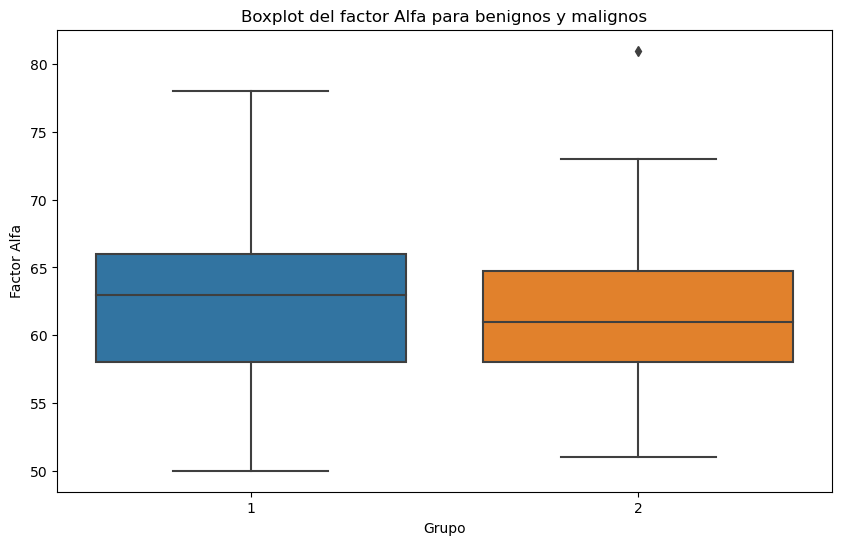

In [33]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='sexo', y='Edad en el primer CT', data=datos)
plt.title('Boxplot del factor Alfa para benignos y malignos')
plt.xlabel('Grupo')
plt.ylabel('Factor Alfa')


plt.show()

In [34]:
# Test de Mann-Whitney para la variable "EDAD" por sexo
resultados_factor_a_TNM = mann_whitney_test(datos, 'sexo', 'Edad en el primer CT')
resultados_factor_a_TNM

{'1 vs 2': {0.0841513802530686}}

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Suponiendo que ya tienes el dataframe 'datos' cargado

# Definir una función para calcular el intervalo del 95% y la mediana con su error
def calcular_estadisticas(serie_edad):
    # Calcular el intervalo del 95%
    q_low = serie_edad.quantile(0.025)
    q_high = serie_edad.quantile(0.975)
    
    # Calcular la mediana y su error
    mediana = serie_edad.median()
    error_mediana = serie_edad.std()
    
    return (q_low, q_high), mediana, error_mediana

# Obtener datos de hombres y mujeres
hombres = datos[datos['sexo'] == 1]
mujeres = datos[datos['sexo'] == 2]

# Calcular estadísticas para hombres
rango_edad_hombres, mediana_edad_hombres, error_mediana_hombres = calcular_estadisticas(hombres['Edad en el primer CT'])

# Calcular estadísticas para mujeres
rango_edad_mujeres, mediana_edad_mujeres, error_mediana_mujeres = calcular_estadisticas(mujeres['Edad en el primer CT'])

# Número total de pacientes
total_pacientes = len(datos)

# Calcular el número de casos y el porcentaje respecto al total para hombres y mujeres
num_hombres = len(hombres)
num_mujeres = len(mujeres)
porcentaje_hombres = (num_hombres / total_pacientes) * 100
porcentaje_mujeres = (num_mujeres / total_pacientes) * 100

# Crear el dataframe de resultados
resultados = [
    ['Hombres', num_hombres, porcentaje_hombres, f"{rango_edad_hombres[0]} - {rango_edad_hombres[1]}", f"{mediana_edad_hombres} ± {error_mediana_hombres}"],
    ['Mujeres', num_mujeres, porcentaje_mujeres, f"{rango_edad_mujeres[0]} - {rango_edad_mujeres[1]}", f"{mediana_edad_mujeres} ± {error_mediana_mujeres}"]
]

resultados_df = pd.DataFrame(resultados, columns=[
    'Sexo', 
    'Número de Casos', 
    'Porcentaje respecto al total', 
    'Rango del 95 de Edad', 
    'Mediana de Edad (Error)'
])

# Exportar a un archivo Excel
archivo_excel = 'estadisticas_edad_sexo.xlsx'
resultados_df.to_excel(archivo_excel, index=False)

print(f"Resultados exportados a {archivo_excel}")


Resultados exportados a estadisticas_edad_sexo.xlsx


# Estudio relaciones Volumen

## Beta

### Maligno-benigno BETA

In [36]:
benignos.dropna(subset=['BETA'],inplace=True)
malignos.dropna(subset=['BETA'],inplace=True)

C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\2475679549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benignos.dropna(subset=['BETA'],inplace=True)
C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\2475679549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malignos.dropna(subset=['BETA'],inplace=True)


In [37]:
# Realizar el test de Mann-Whitney
stat, p_value = mannwhitneyu(benignos['BETA'], malignos['BETA'])

# Mostrar los resultados
print("Estadístico de prueba:", stat)
print("p-valor:", p_value)

if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos 'benignos' y 'malignos'.")
else:
    print("No hay diferencias significativas entre los grupos 'benignos' y 'malignos'.")

Estadístico de prueba: 5749.0
p-valor: 0.00588920192252487
Hay diferencias significativas entre los grupos 'benignos' y 'malignos'.


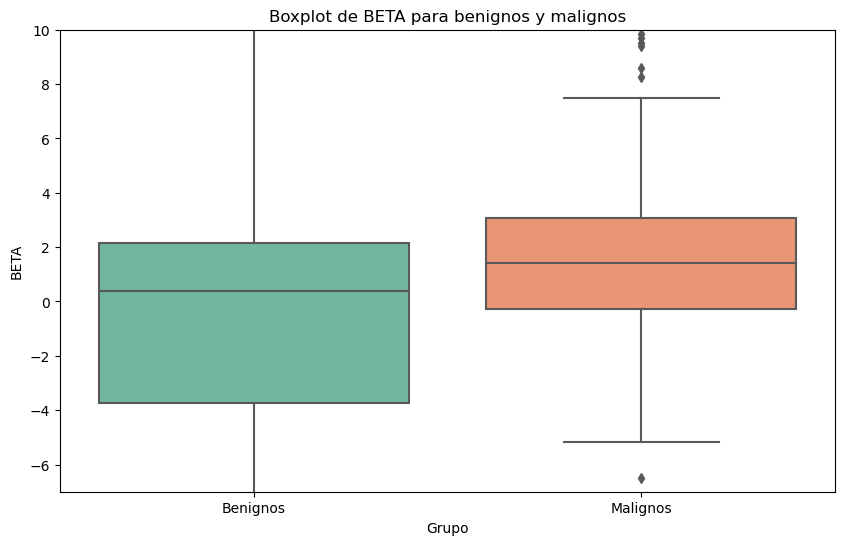

In [38]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='MALIGNO', y='BETA', data=datos,palette="Set2")
bplot = ax.boxplot
plt.title('Boxplot de BETA para benignos y malignos')
plt.xlabel('Grupo')
plt.ylabel('BETA')

ax.set_xticklabels(['Benignos' if label == False else 'Malignos' for label in ax.get_xticks()])
ax.set_ylim(-7, 10)
plt.show()

In [94]:
filtro = datos['COD_AP'].isin([0, 1, 3, 4])
celgrandes = datos[filtro]
mediana=celgrandes.groupby('sexo')['Edad en el primer CT'].agg(['median', 'std'])

porcentaje_sexo = celgrandes['sexo'].value_counts(normalize=True) * 100

print(porcentaje_sexo)

sexo
1    71.333333
2    28.666667
Name: proportion, dtype: float64


In [40]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Suponemos que el DataFrame 'datos' ya está cargado
# datos = pd.read_excel('datos.xlsx')

# Función para calcular el intervalo de confianza y el error estándar usando bootstrap
def bootstrap_median_ci(data, num_samples=1000, ci=95):
    medians = []
    n = len(data)
    
    # Generar muestras bootstrap y calcular la mediana para cada muestra
    for _ in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        medians.append(np.median(sample))
    
    # Calcular el intervalo de confianza
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    ci_lower = np.percentile(medians, lower_percentile)
    ci_upper = np.percentile(medians, upper_percentile)
    
    # Calcular el error estándar de la mediana
    standard_error = np.std(medians)
    
    return (ci_lower, ci_upper), standard_error

# Separar datos en benignos y malignos
benignos = datos[datos['MALIGNO'] == 0]
malignos = datos[datos['MALIGNO'] == 1]

# Lista para almacenar resultados
resultados = []

# Análisis para benignos y malignos
for grupo, nombre_grupo in zip([benignos, malignos], ['Benignos', 'Malignos']):
    for columna in ['ImageMean1', 'ImageMean3','MeanAt']:
        data_columna = grupo[columna].dropna()  # Asegurarse de no tener valores nulos
        
        # Calcular mediana
        mediana = np.median(data_columna)
        
        # Calcular intervalo de confianza del 95% y error estándar usando bootstrap
        ic_95, standard_error = bootstrap_median_ci(data_columna)

       
        # Agregar resultados a la lista
        resultados.append([nombre_grupo, columna, mediana, standard_error, ic_95])
        
# Crear el DataFrame de resultados
resultados_df = pd.DataFrame(resultados, columns=[
    'Grupo', 
    'Columna', 
    'Mediana', 
    'Error estándar', 
    'IC 95%'
])

# Mostrar el DataFrame de resultados
print(resultados_df)

# Guardar los resultados en un archivo Excel
resultados_df.to_excel('resultados_medianas_atenuacion.xlsx', index=False)


      Grupo     Columna     Mediana  Error estándar  \
0  Benignos  ImageMean1 -169.727500        9.900365   
1  Benignos  ImageMean3 -190.709050       11.474121   
2  Benignos      MeanAt -192.503667       14.361913   
3  Malignos  ImageMean1 -319.893850       25.273023   
4  Malignos  ImageMean3 -237.028500       18.669930   
5  Malignos      MeanAt -289.278117       19.339670   

                                      IC 95%  
0                     (-193.0164, -155.3547)  
1                     (-211.11755, -165.067)  
2            (-216.06266666666664, -163.707)  
3                   (-372.2677125, -275.632)  
4        (-288.20349999999996, -210.6463875)  
5  (-325.3896458333333, -251.61810791666667)  


In [41]:
# Definir una función para calcular la mediana y su error mediante bootstrap
def mediana_con_error(data, num_bootstrap=1000):
    medianas = []
    for _ in range(num_bootstrap):
        muestra = np.random.choice(data, size=len(data), replace=True)
        medianas.append(np.median(muestra))
    mediana = np.median(medianas)
    error = np.std(medianas)
    return mediana, error

# Agrupar por la columna 'MALIGNO' y calcular la mediana y su error para 'BETA'
resultados = []
for grupo, datos_grupo in datos.groupby('MALIGNO'):
    mediana, error = mediana_con_error(datos_grupo['BETA'].dropna())
    resultados.append([grupo, mediana, error])

# Convertir el resultado a un DataFrame para mejor visualización
mediana_df = pd.DataFrame(resultados, columns=['MALIGNO', 'Mediana de BETA', 'Error de la Mediana'])

# Mostrar el DataFrame de resultados
print(mediana_df)


   MALIGNO  Mediana de BETA  Error de la Mediana
0    False         0.385154             0.583430
1     True         1.420336             0.171277


In [42]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Suponemos que el DataFrame 'datos' ya está cargado
# datos = pd.read_excel('malignos.xlsx')

# Función para calcular la mediana y la desviación estándar robusta (MAD)
def calcular_mediana_y_mad(datos):
    mediana = np.median(datos)
    mad = np.median(np.abs(datos - mediana))
    return mediana, mad

# Obtener los valores únicos de la columna 'MALIGNO'
valores_maligno = datos['MALIGNO'].unique()

resultados = []

for valor_maligno in valores_maligno:
    data_valor_maligno = datos[datos['MALIGNO'] == valor_maligno]['BETA']
    
    # Calcular porcentajes
    total = len(data_valor_maligno)
    positivos = sum(data_valor_maligno > 0)
    negativos = sum(data_valor_maligno < 0)
    
    porcentaje_positivos = (positivos / total) * 100
    porcentaje_negativos = (negativos / total) * 100
    
    # Calcular mediana y MAD (Median Absolute Deviation)
    mediana, mad = calcular_mediana_y_mad(data_valor_maligno)
    
    # Calcular intervalo de confianza del 95% utilizando MAD
    # Estimación del error margin: 1.253 * mad / sqrt(n)
    n = len(data_valor_maligno)
    error_margin = 1.253 * mad / (n**0.5) * norm.ppf(0.975)  # 95% confidence interval
    ic_95 = (mediana - error_margin, mediana + error_margin)
    
    resultados.append([valor_maligno, porcentaje_positivos, porcentaje_negativos, ic_95, f"{mediana} (MAD: {mad})"])

# Crear el DataFrame de resultados
resultados_df = pd.DataFrame(resultados, columns=[
    'Valor MALIGNO', 
    'Porcentaje Positivos', 
    'Porcentaje Negativos', 
    'IC 95%', 
    'Mediana (MAD)'
])

# Mostrar el DataFrame de resultados
print(resultados_df)

# Guardar los resultados en un archivo Excel
resultados_df.to_excel('resultados_por_valor_maligno.xlsx', index=False)


   Valor MALIGNO  Porcentaje Positivos  Porcentaje Negativos  \
0           True             74.050633             25.949367   
1          False             52.173913             47.826087   

                                      IC 95%  \
0    (1.091533226107265, 1.7605284343411953)   
1  (-0.4946429585482903, 1.2649512870579402)   

                                   Mediana (MAD)  
0   1.4260308302242302 (MAD: 1.7120734515484255)  
1  0.38515416425482496 (MAD: 3.4361909448273904)  


In [43]:
# Filtrar filas donde 'MALIGNO' es False y 'BETA' es positivo
filtered_data = datos[(datos['MALIGNO'] == False) & (datos['BETA'] > 0)]

# Calcular la mediana de la columna 'BETA' para las filas filtradas
median_beta = filtered_data['BETA'].median()
median_beta

2.10861188140511

### Estadio-Beta

En primer lugar, contaremos el número de casos de cada estadio para ver de cuáles de ellos tenemos una muestra suficiente para realizar análisis de poblaciones.

In [44]:
malignos['Estadio'] = malignos['Estadio'].replace({
    'IA': 'I', 'IB': 'I', 'IIA': 'II', 'IIB': 'II', 'IIIA': 'III', 'IIIB': 'III', 'IVA': 'IV'
})
# Contar los casos de cada tipo en la columna "Estadio"
conteo_estadios = malignos['Estadio'].value_counts()

malignos.to_excel('malignos.xlsx')
# Mostrar los resultados
print(conteo_estadios)

Estadio
I      121
III     17
II      15
Tmi      2
Tis      2
IV       1
Name: count, dtype: int64


C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_40916\4290711672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malignos['Estadio'] = malignos['Estadio'].replace({


Los estadios que estudiaremos, por tanto, serán IA,IB, IIB y IIIA

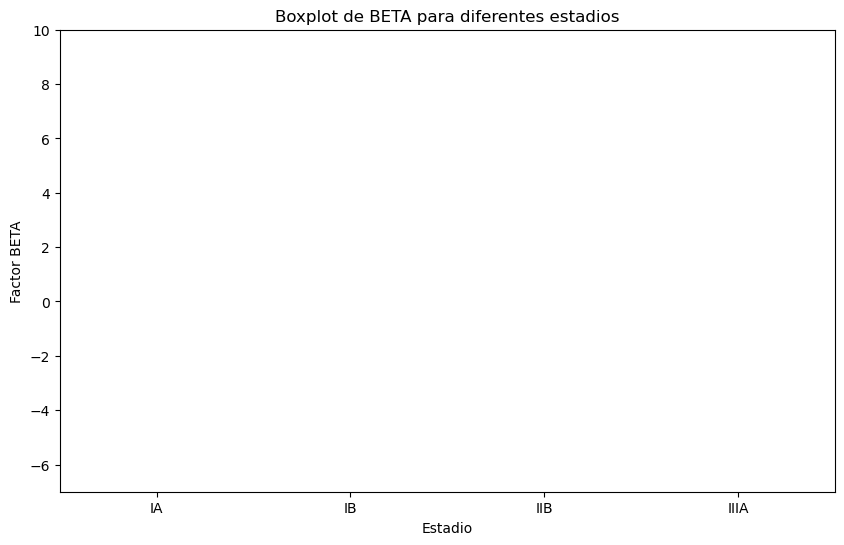

In [45]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='Estadio', y='BETA', data=malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], order=['IA', 'IB', 'IIB', 'IIIA'])
plt.title('Boxplot de BETA para diferentes estadios')
plt.xlabel('Estadio')
plt.ylabel('Factor BETA')
ax.set_ylim(-7, 10)
plt.show()

In [46]:


# Supongamos que ya tienes el DataFrame 'malignos' cargado

# Filtrar los datos para incluir solo los valores I, II y III en la columna 'Estadio'
malignos_filtrados = malignos[malignos['Estadio'].isin(['I', 'II', 'III'])]

# Agrupar los valores de 'BETA' según el 'Estadio'
grupo_I = malignos_filtrados[malignos_filtrados['Estadio'] == 'I']['BETA']
grupo_II = malignos_filtrados[malignos_filtrados['Estadio'] == 'II']['BETA']
grupo_III = malignos_filtrados[malignos_filtrados['Estadio'] == 'III']['BETA']

# Realizar el test de Kruskal-Wallis
stat, p_value = kruskal(grupo_I, grupo_II, grupo_III)

# Mostrar los resultados
print(f"Estadístico de Kruskal-Wallis: {stat}")
print(f"Valor p: {p_value}")

# Interpretación del resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: No hay una diferencia significativa entre los grupos.")


Estadístico de Kruskal-Wallis: 1.2725233072854394
Valor p: 0.5292673148686906
No se rechaza la hipótesis nula: No hay una diferencia significativa entre los grupos.


In [47]:
import pandas as pd
import numpy as np

# Supongamos que ya tienes el DataFrame 'malignos' cargado

# Filtrar los datos para incluir solo los valores I, II y III en la columna 'Estadio'
malignos_filtrados = malignos[malignos['Estadio'].isin(['I', 'II', 'III'])]

# Definir una función para calcular la mediana y su error mediante bootstrap
def mediana_con_error(data, num_bootstrap=1000):
    medianas = []
    for _ in range(num_bootstrap):
        muestra = np.random.choice(data, size=len(data), replace=True)
        medianas.append(np.median(muestra))
    mediana = np.median(medianas)
    error = np.std(medianas)
    return mediana, error

# Inicializar la lista para almacenar los resultados
resultados = []

# Agrupar por 'Estadio' y calcular la mediana y su error para 'BETA'
for estadio in ['I', 'II', 'III']:
    datos_estadio = malignos_filtrados[malignos_filtrados['Estadio'] == estadio]['BETA'].dropna()
    mediana, error = mediana_con_error(datos_estadio)
    resultados.append([estadio, mediana, error])

# Convertir el resultado a un DataFrame para mejor visualización
resultados_df = pd.DataFrame(resultados, columns=['Estadio', 'Mediana de BETA', 'Error de la Mediana'])

# Mostrar el DataFrame de resultados
print(resultados_df)


  Estadio  Mediana de BETA  Error de la Mediana
0       I         1.304017             0.174759
1      II         2.016367             0.476750
2     III         1.976817             0.393339


In [48]:
def mann_whitney_test(df, group_col, value_col):
    unique_groups = df[group_col].unique()
    results = {}
    
    # Realizar el test de Mann-Whitney para cada par de grupos
    for i in range(len(unique_groups)):
        for j in range(i + 1, len(unique_groups)):
            group1 = unique_groups[i]
            group2 = unique_groups[j]
            group1_data = df[df[group_col] == group1][value_col]
            group2_data = df[df[group_col] == group2][value_col]
            
            stat, p_value = mannwhitneyu(group1_data, group2_data)
            results[f'{group1} vs {group2}'] = { p_value} #'estadistico': stat, 'p_valor':
    
    return results

In [49]:
# Test de Mann-Whitney para la variable "BETA"
resultados_BETA = mann_whitney_test(malignos.loc[malignos['Estadio'].isin(['I', 'II', 'III'])], 'Estadio', 'BETA')

# Test de Mann-Whitney para la variable "ImageMean1"
resultados_imagemean1 = mann_whitney_test(malignos.loc[malignos['Estadio'].isin(['I', 'II', 'III'])], 'Estadio', 'ImageMean1')

# Mostrar los resultados
#print("Resultados para 'BETA':")
#for comparacion, resultados in resultados_BETA.items():
    #print(f"Comparación: {comparacion}, Estadístico: {resultados['estadistico']}, p-valor: {resultados['p_valor']}")


resultados_BETA
#resultados_imagemean1

{'II vs I': {0.45728798211791877},
 'II vs III': {0.8502388119760906},
 'I vs III': {0.3576097395716126}}

In [50]:
# Calcular la correlación de Spearman
corr, p_value = spearmanr(malignos['COD_ESTADIO'], malignos['BETA'])

# Mostrar los resultados
print(f"Coeficiente de correlación de Spearman: {corr}")
print(f"p-valor: {p_value}")

Coeficiente de correlación de Spearman: 0.06156805634119666
p-valor: 0.442200357658895


In [51]:
def mann_whitney_matrix(df, group_col, value_col):
    unique_groups = df[group_col].unique()
    results_matrix = pd.DataFrame(index=unique_groups, columns=unique_groups)
    
    # Realizar el test de Mann-Whitney para cada par de grupos
    for i in range(len(unique_groups)):
        for j in range(len(unique_groups)):
            if i < j:
                group1 = unique_groups[i]
                group2 = unique_groups[j]
                group1_data = df[df[group_col] == group1][value_col]
                group2_data = df[df[group_col] == group2][value_col]
                
                _, p_value = mannwhitneyu(group1_data, group2_data)
                results_matrix.loc[group1, group2] = p_value
                results_matrix.loc[group2, group1] = p_value
            elif i == j:
                results_matrix.loc[unique_groups[i], unique_groups[j]] = 1.0  # p-valor de comparación consigo mismo
    
    return results_matrix

In [52]:
# Test de Mann-Whitney para la variable "BETA"
resultados_BETA_matrix = mann_whitney_matrix(malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], 'Estadio', 'BETA')

# Test de Mann-Whitney para la variable "ImageMean1"
resultados_imagemean1_matrix = mann_whitney_matrix(malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], 'Estadio', 'ImageMean1')

# Mostrar las matrices de resultados
print("Matriz de p-valores para 'BETA':")
print(resultados_BETA_matrix)

print("\nMatriz de p-valores para 'ImageMean1':")
print(resultados_imagemean1_matrix)

Matriz de p-valores para 'BETA':
Empty DataFrame
Columns: []
Index: []

Matriz de p-valores para 'ImageMean1':
Empty DataFrame
Columns: []
Index: []


In [53]:
import pandas as pd
from scipy.stats import sem, norm

# Suponemos que el DataFrame 'malignos' ya está cargado
# malignos = pd.read_excel('malignos.xlsx')

# Filtrar por estadio
estadios = ['I', 'II', 'III']
resultados = []

for estadio in estadios:
    data_estadio = malignos[malignos['Estadio'] == estadio]['BETA']
    
    # Calcular porcentajes
    total = len(data_estadio)
    positivos = sum(data_estadio > 0)
    negativos = sum(data_estadio < 0)
    
    porcentaje_positivos = (positivos / total) * 100
    porcentaje_negativos = (negativos / total) * 100
    
    # Calcular intervalo de confianza del 95% utilizando la mediana
    mediana = data_estadio.median()
    
    # Estimación de la desviación estándar de la mediana
    # Utilizando la fórmula: desviacion_estandar_mediana = 1.253 * desviacion_estandar / sqrt(n)
    desviacion_estandar = data_estadio.std()
    n = len(data_estadio)
    desviacion_estandar_mediana = 1.253 * desviacion_estandar / (n**0.5)
    
    error_margin = desviacion_estandar_mediana * norm.ppf(0.975)  # 95% confidence interval
    ic_95 = (mediana - error_margin, mediana + error_margin)
    betamin=data_estadio.min()
    betamax=data_estadio.max()
    
    resultados.append([estadio, porcentaje_positivos, porcentaje_negativos,betamin,betamax, ic_95, f"{mediana} ({desviacion_estandar})"])

# Crear el DataFrame de resultados
resultados_df = pd.DataFrame(resultados, columns=[
    'Estadio', 
    'Porcentaje Positivos', 
    'Porcentaje Negativos', 
    'betamin',
    'betamax',
    'IC 95%', 
    'Mediana (Desviación Estándar)'
])

# Mostrar el DataFrame de resultados
print(resultados_df)

# Guardar los resultados en un archivo Excel
#resultados_df.to_excel('resultados_estadios_con_mediana.xlsx', index=False)


  Estadio  Porcentaje Positivos  Porcentaje Negativos     betamin  \
0       I             72.727273             27.272727 -183.933544   
1      II             86.666667             13.333333  -21.723399   
2     III             88.235294             11.764706  -67.891352   

       betamax                                     IC 95%  \
0  1494.958529    (-29.606802917715694, 32.2148365441445)   
1     8.248789  (-2.2223556882868998, 6.2550897064608595)   
2    19.037305   (-8.809232368801844, 12.762866389164923)   

           Mediana (Desviación Estándar)  
0   1.3040168132144 (138.45353400177103)  
1      2.01636700908698 (6.684693095244)  
2  1.97681701018154 (18.108717881782542)  


In [54]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Suponemos que el DataFrame 'malignos' ya está cargado
# malignos = pd.read_excel('malignos.xlsx')

# Función para calcular la mediana y la desviación estándar robusta (MAD)
def calcular_mediana_y_mad(datos):
    mediana = np.median(datos)
    mad = np.median(np.abs(datos - mediana))
    return mediana, mad

# Filtrar por estadio
estadios = ['I', 'II', 'III']
resultados = []

for estadio in estadios:
    data_estadio = malignos[malignos['Estadio'] == estadio]['BETA']
    
    # Calcular porcentajes
    total = len(data_estadio)
    positivos = sum(data_estadio > 0)
    negativos = sum(data_estadio < 0)
    
    porcentaje_positivos = (positivos / total) * 100
    porcentaje_negativos = (negativos / total) * 100
    
    # Calcular mediana y MAD (Median Absolute Deviation)
    mediana, mad = calcular_mediana_y_mad(data_estadio)
    
    # Calcular intervalo de confianza del 95% utilizando MAD
    # Estimación del error margin: 1.253 * mad / sqrt(n)
    n = len(data_estadio)
    error_margin = 1.253 * mad / (n**0.5) * norm.ppf(0.975)  # 95% confidence interval
    ic_95 = (mediana - error_margin, mediana + error_margin)
    
    resultados.append([estadio, porcentaje_positivos, porcentaje_negativos, ic_95, f"{mediana} (MAD: {mad})"])

# Crear el DataFrame de resultados
resultados_df = pd.DataFrame(resultados, columns=[
    'Estadio', 
    'Porcentaje Positivos', 
    'Porcentaje Negativos', 
    'IC 95%', 
    'Mediana (MAD)'
])

# Mostrar el DataFrame de resultados
print(resultados_df)

# Guardar los resultados en un archivo Excel
resultados_df.to_excel('resultados_estadios_con_mediana_robusta.xlsx', index=False)


  Estadio  Porcentaje Positivos  Porcentaje Negativos  \
0       I             72.727273             27.272727   
1      II             86.666667             13.333333   
2     III             88.235294             11.764706   

                                    IC 95%  \
0  (0.9015569225456292, 1.706476703883171)   
1  (1.250365465642179, 2.7823685525317807)   
2  (1.315831982404975, 2.6378020379581053)   

                                Mediana (MAD)  
0    1.3040168132144 (MAD: 1.802669571434917)  
1  2.01636700908698 (MAD: 1.2080255289132569)  
2  1.97681701018154 (MAD: 1.1097289629890592)  


In [55]:
from scipy.stats import sem, norm

# Suponemos que el DataFrame 'malignos' ya está cargado
# malignos = pd.read_excel('malignos.xlsx')

# Filtrar por estadio
estadios = ['I', 'II', 'III']
resultados = []

for estadio in estadios:
    data_estadio = malignos[malignos['Estadio'] == estadio]['BETA']
    
    # Calcular porcentajes
    total = len(data_estadio)
    positivos = sum(data_estadio > 0)
    negativos = sum(data_estadio < 0)
    
    porcentaje_positivos = (positivos / total) * 100
    porcentaje_negativos = (negativos / total) * 100
    
    # Calcular intervalo de confianza del 95%
    media = data_estadio.mean()
    error_margin = sem(data_estadio) * norm.ppf(0.975)  # 95% confidence interval
    ic_95 = (media - error_margin, media + error_margin)
    
    # Calcular mediana y su error (desviación estándar)
    mediana = data_estadio.median()
    desviacion_estandar = data_estadio.std()
    
    resultados.append([estadio, porcentaje_positivos, porcentaje_negativos, ic_95, f"{mediana} ({desviacion_estandar})"])

# Crear el DataFrame de resultados
resultados_df = pd.DataFrame(resultados, columns=[
    'Estadio', 
    'Porcentaje Positivos', 
    'Porcentaje Negativos', 
    'IC 95%', 
    'Mediana (Desviación Estándar)'
])

# Mostrar el DataFrame de resultados
print(resultados_df)

# Guardar los resultados en un archivo Excel
resultados_df.to_excel('resultados_estadios.xlsx', index=False)


  Estadio  Porcentaje Positivos  Porcentaje Negativos  \
0       I             72.727273             27.272727   
1      II             86.666667             13.333333   
2     III             88.235294             11.764706   

                                     IC 95%  \
0  (-13.907184936109052, 35.43171327766605)   
1  (-2.4240233535215214, 4.341695237657856)   
2   (-10.064442428774399, 7.15191731421584)   

           Mediana (Desviación Estándar)  
0   1.3040168132144 (138.45353400177103)  
1      2.01636700908698 (6.684693095244)  
2  1.97681701018154 (18.108717881782542)  


### TNM - BETA

In [56]:
# Contar los casos de cada tipo en la columna "TNM"
conteo_TNM = malignos['TNM'].value_counts()

# Mostrar los resultados
print(conteo_TNM)


TNM
T1aN0M0        78
T1bN0M0        19
T2aN0M0        12
T3N0M0          7
T1miN0M0        6
T4N0M0          4
T1aN2M0         4
T1cN0M0         3
T2aN2M0         3
T1a(mi)N0M0     2
T1cN2M0         2
TisN0M0         2
T1aN1M0         2
T2aN1M0         2
T1N0M0          2
T1bN3M0         1
T1N2M0          1
T2bN0M0         1
T1cN1M0         1
T1bN2M0         1
T3N1M0          1
T1N3M0          1
T1aN0M1c        1
T1bN1M0         1
TmiN0M0         1
Name: count, dtype: int64


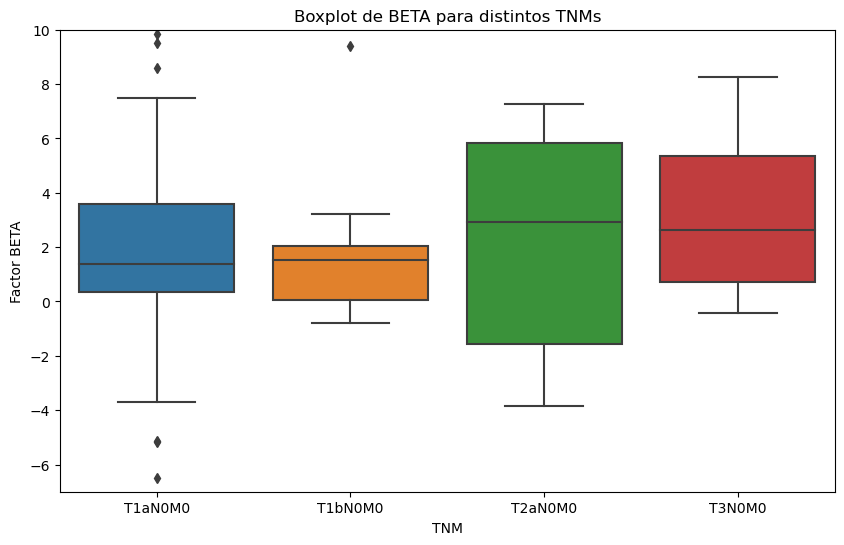

In [57]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='TNM', y='BETA', data=malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])], order=['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])
plt.title('Boxplot de BETA para distintos TNMs')
plt.xlabel('TNM')
plt.ylabel('Factor BETA')
ax.set_ylim(-7, 10)
plt.show()

In [58]:
# Test de Mann-Whitney para la variable "BETA"
resultados_BETA_TNM = mann_whitney_test(malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])], 'TNM', 'BETA')

# Test de Mann-Whitney para la variable "ImageMean1"
#resultados_imagemean1 = mann_whitney_test(malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])]], 'Estadio', 'ImageMean1')

# Mostrar los resultados
#print("Resultados para 'BETA':")
#for comparacion, resultados in resultados_BETA.items():
    #print(f"Comparación: {comparacion}, Estadístico: {resultados['estadistico']}, p-valor: {resultados['p_valor']}")

#print("\nResultados para 'ImageMean1':")
#for comparacion, resultados in resultados_imagemean1.items():
    #print(f"Comparación: {comparacion}, Estadístico: {resultados['estadistico']}, p-valor: {resultados['p_valor']}")

resultados_BETA_TNM
#resultados_imagemean1

{'T2aN0M0 vs T3N0M0': {0.9018020163530999},
 'T2aN0M0 vs T1aN0M0': {0.4299244260292783},
 'T2aN0M0 vs T1bN0M0': {0.320414622404091},
 'T3N0M0 vs T1aN0M0': {0.5253299459838235},
 'T3N0M0 vs T1bN0M0': {0.42726056552143504},
 'T1aN0M0 vs T1bN0M0': {0.5699593304471242}}

In [59]:
# Función para extraer los valores de T, N y M
def extract_tnm(tnm_string):
    t_match = re.search(r'T\d', tnm_string)
    n_match = re.search(r'N\d', tnm_string)
    m_match = re.search(r'M\d', tnm_string)
    
    t = t_match.group() if t_match else None
    n = n_match.group() if n_match else None
    m = m_match.group() if m_match else None
    
    return t, n, m

# Aplicar la función a la columna "TNM" del dataframe "malignos"
tnm_values = malignos['TNM'].apply(extract_tnm)

# Crear el nuevo dataframe "TNM" con las columnas "T", "N" y "M"
TNM = pd.DataFrame(tnm_values.tolist(), columns=['T', 'N', 'M'])

# Añadir la columna "BETA" de "malignos" al dataframe "TNM"
TNM['BETA'] = malignos['BETA'].values
TNM['CoefParabolAtenuacion']=malignos['CoefParabolAtenuacion'].values
TNM['ImageMean1']=malignos['ImageMean1'].values
TNM['ImageMean3']=malignos['ImageMean3'].values
TNM['MeanAt']=malignos['MeanAt'].values
TNM['tcambio']=malignos['tcambio'].values
TNM['ALFA'] = malignos['ALFA'].values

# Mantener el mismo índice que en el dataframe "malignos"
TNM.index = malignos.index

# Contar los casos de cada tipo en la columna "T","N" y "M"
conteo_T = TNM['T'].value_counts()
conteo_N = TNM['N'].value_counts()
conteo_M = TNM['M'].value_counts()
# Mostrar los resultados
print(conteo_T)
print(conteo_N)
print(conteo_M)

T
T1    125
T2     18
T3      8
T4      4
Name: count, dtype: int64
N
N0    138
N2     11
N1      7
N3      2
Name: count, dtype: int64
M
M0    157
M1      1
Name: count, dtype: int64


Dado que hay muy pocos casos con metástasis, no tiene sentido comparar las variables M. Compararemos en función de BETA los valores de T y N.

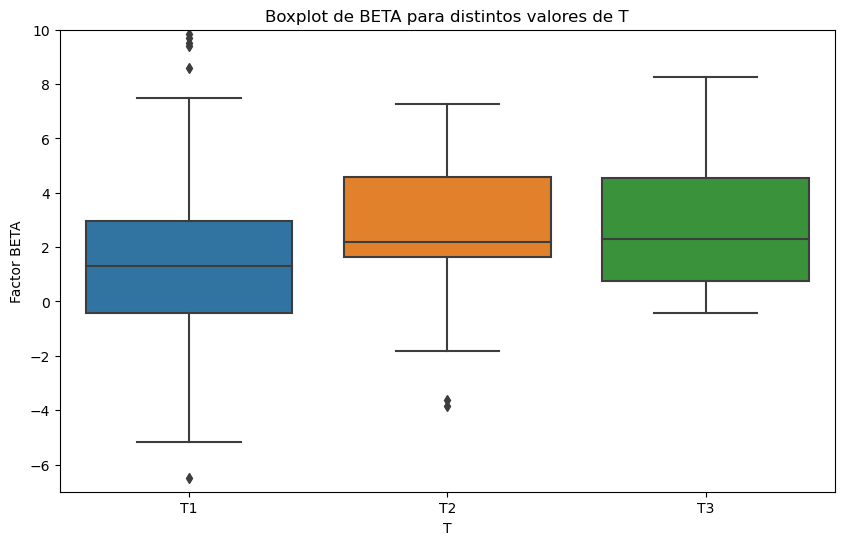

In [60]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='T', y='BETA', data=TNM[TNM['T'].isin(['T1', 'T2', 'T3'])],order=['T1', 'T2', 'T3'])
plt.title('Boxplot de BETA para distintos valores de T')
plt.xlabel('T')
plt.ylabel('Factor BETA')
ax.set_ylim(-7, 10)
plt.show()

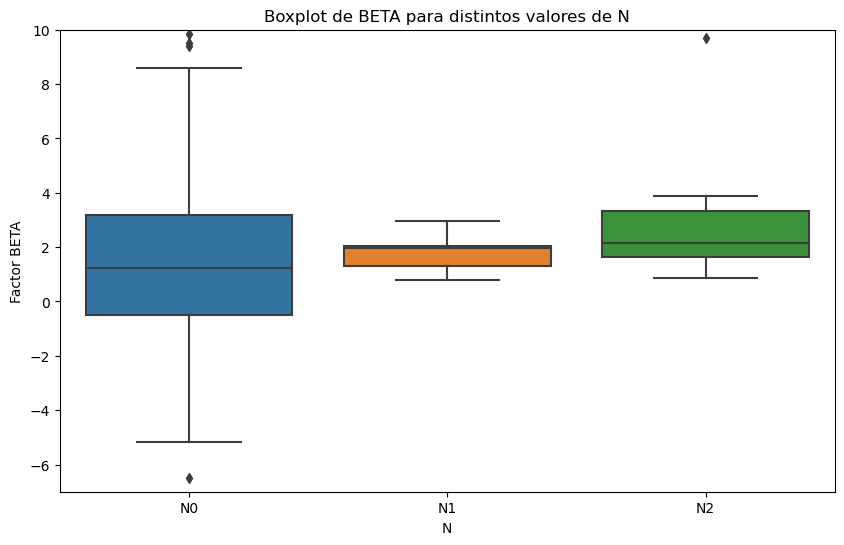

In [61]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='N', y='BETA', data=TNM[TNM['N'].isin(['N1', 'N2', 'N0'])], order=['N0', 'N1', 'N2'])
plt.title('Boxplot de BETA para distintos valores de N')
plt.xlabel('N')
plt.ylabel('Factor BETA')
ax.set_ylim(-7, 10)
plt.show()

In [62]:
# Test de Mann-Whitney para la variable "BETA"
resultados_BETA_T = mann_whitney_test(TNM[TNM['T'].isin(['T1', 'T2', 'T3'])], 'T', 'BETA')
# Test de Mann-Whitney para la variable "BETA"
resultados_BETA_N = mann_whitney_test(TNM[TNM['N'].isin(['N0', 'N2', 'N1'])], 'N', 'BETA')


#print("\nResultados para 'ImageMean1':")
#for comparacion, resultados in resultados_imagemean1.items():
    #print(f"Comparación: {comparacion}, Estadístico: {resultados['estadistico']}, p-valor: {resultados['p_valor']}")

print(resultados_BETA_T)
print(resultados_BETA_N)
#resultados_imagemean1

{'T1 vs T2': {0.1199642939313537}, 'T1 vs T3': {0.3061988196338172}, 'T2 vs T3': {0.8490886687683028}}
{'N1 vs N0': {0.8249665387208993}, 'N1 vs N2': {0.3283056812468577}, 'N0 vs N2': {0.07711140268620335}}


No hay diferencias significativas.

### Código AP-BETA

En primer lugar, comprobamos el número de pacientes de los cuales disponemos para cada código.

In [63]:
# Contar los casos de cada tipo en la columna "TNM"
conteo_AP = datos['COD_AP'].value_counts()

# Mostrar los resultados
conteo_AP

COD_AP
1     135
16     42
11     30
0      11
13     10
2       6
12      5
10      3
15      3
3       2
4       2
14      1
Name: count, dtype: int64

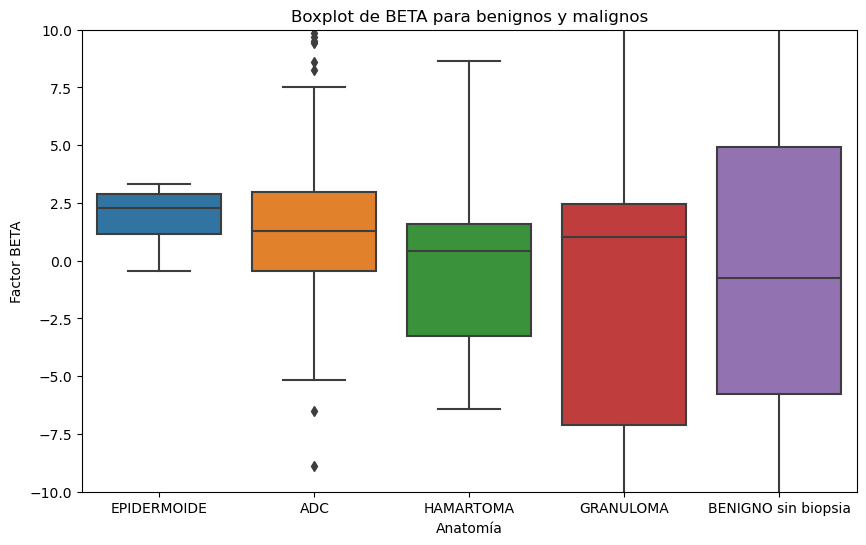

In [64]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='COD_AP', y='BETA', data=datos.loc[datos['COD_AP'].isin([1, 16, 11, 0,13])])
plt.title('Boxplot de BETA para benignos y malignos')
plt.xlabel('Anatomía')
plt.ylabel('Factor BETA')
ax.set_xticklabels(['EPIDERMOIDE', 'ADC', 'HAMARTOMA', 'GRANULOMA', 'BENIGNO sin biopsia'])
ax.set_ylim(-10, 10)
plt.show()

In [65]:
# Test de Mann-Whitney para la variable "BETA"
resultados_BETA_COD_AP = mann_whitney_test(datos.loc[datos['COD_AP'].isin([1, 16, 11, 0,13])], 'COD_AP', 'BETA')
resultados_BETA_COD_AP

{'1 vs 11': {0.035197548622731084},
 '1 vs 0': {0.35790198037897714},
 '1 vs 13': {0.48985292410191383},
 '1 vs 16': {0.08132459591026137},
 '11 vs 0': {0.04383494952178332},
 '11 vs 13': {0.8147741079934662},
 '11 vs 16': {0.7534384050496521},
 '0 vs 13': {0.3072263700681952},
 '0 vs 16': {0.21529278249566663},
 '13 vs 16': {1.0}}

No se observan diferencias reseñables

## ALFA

### ALFA-Malignidad

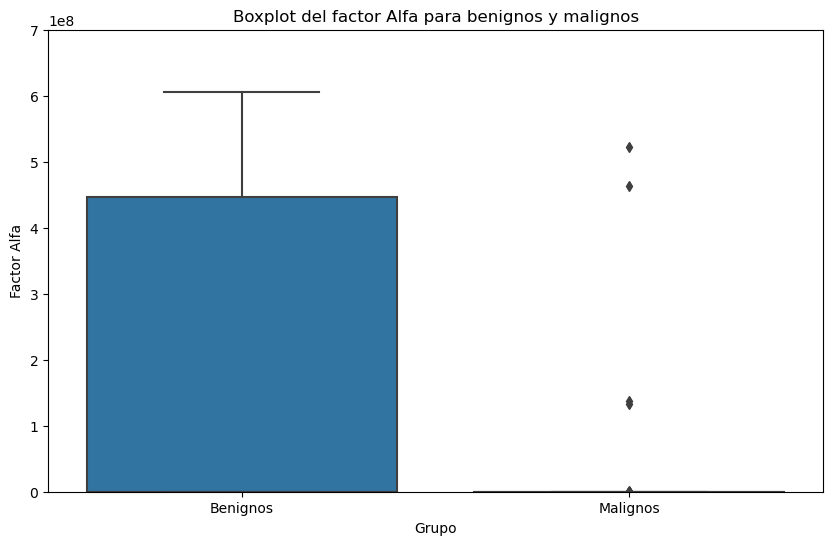

In [66]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='MALIGNO', y='ALFA', data=datos)
plt.title('Boxplot del factor Alfa para benignos y malignos')
plt.xlabel('Grupo')
plt.ylabel('Factor Alfa')
ax.set_xticklabels(['Benignos' if label == False else 'Malignos' for label in ax.get_xticks()])
ax.set_ylim(-0, 700000000)
plt.show()

In [67]:
# Test de Mann-Whitney para la variable "ALFA"
resultados_ALFA = mannwhitneyu(benignos['ALFA'], malignos['ALFA'])
resultados_ALFA

MannwhitneyuResult(statistic=8567.0, pvalue=0.0185273648188306)

### ALFA-Estadio

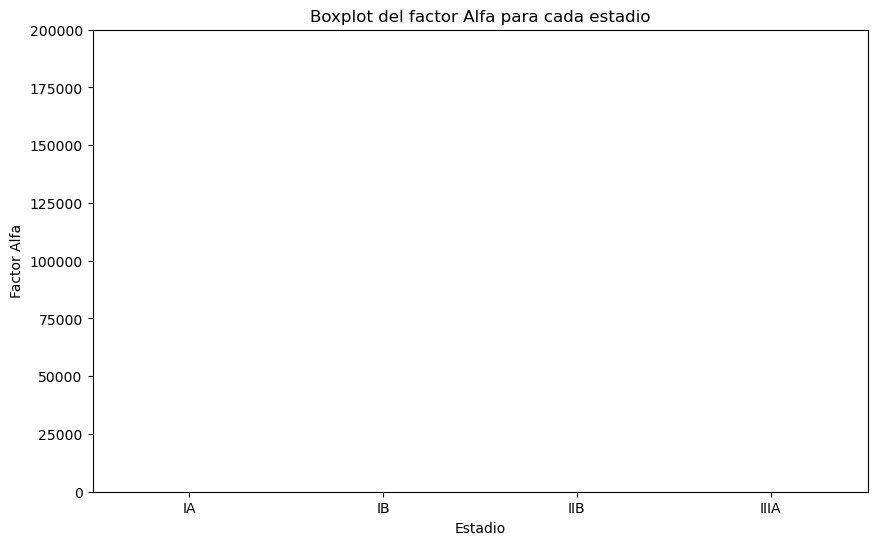

In [68]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='Estadio', y='ALFA', data=malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], order=['IA', 'IB', 'IIB', 'IIIA'])
plt.title('Boxplot del factor Alfa para cada estadio')
plt.xlabel('Estadio')
plt.ylabel('Factor Alfa')
ax.set_ylim(-0, 200000)
plt.show()

In [69]:
resultados_ALFA_Estadio = mann_whitney_test(malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], 'Estadio', 'ALFA')
resultados_ALFA_Estadio

{}

### ALFA-TNM

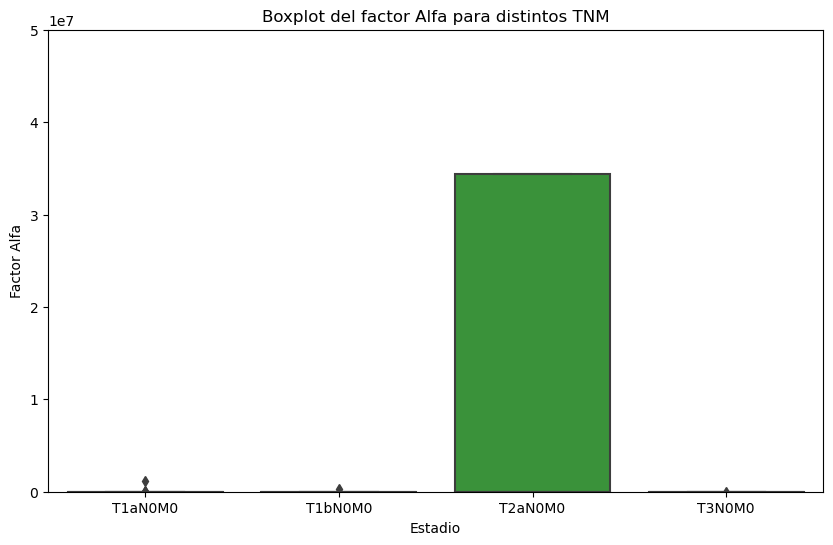

In [70]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='TNM', y='ALFA', data=malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])], order=['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])
plt.title('Boxplot del factor Alfa para distintos TNM')
plt.xlabel('Estadio')
plt.ylabel('Factor Alfa')
ax.set_ylim(-0, 50000000)
plt.show()

In [71]:
resultados_ALFA_TNM = mann_whitney_test(malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])], 'TNM', 'ALFA')
resultados_ALFA_TNM

{'T2aN0M0 vs T3N0M0': {0.967135032150512},
 'T2aN0M0 vs T1aN0M0': {0.38949259367837263},
 'T2aN0M0 vs T1bN0M0': {0.4778785826934536},
 'T3N0M0 vs T1aN0M0': {0.5672489472385058},
 'T3N0M0 vs T1bN0M0': {0.6924992398905441},
 'T1aN0M0 vs T1bN0M0': {0.8915468253716822}}

#### ALFA- Estudio T y N

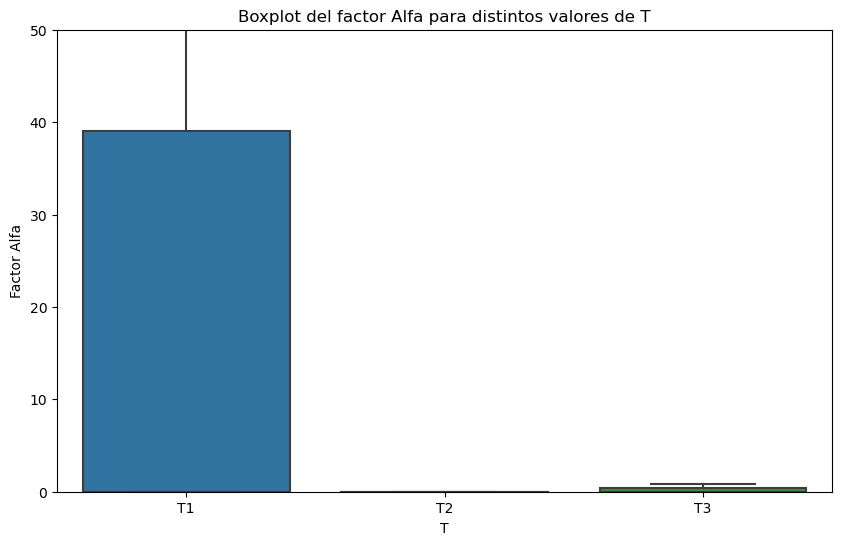

In [72]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='T', y='ALFA', data=TNM[TNM['T'].isin(['T1', 'T2', 'T3'])],order=['T1', 'T2', 'T3'])
plt.title('Boxplot del factor Alfa para distintos valores de T')
plt.xlabel('T')
plt.ylabel('Factor Alfa')
ax.set_ylim(-0, 50)
plt.show()

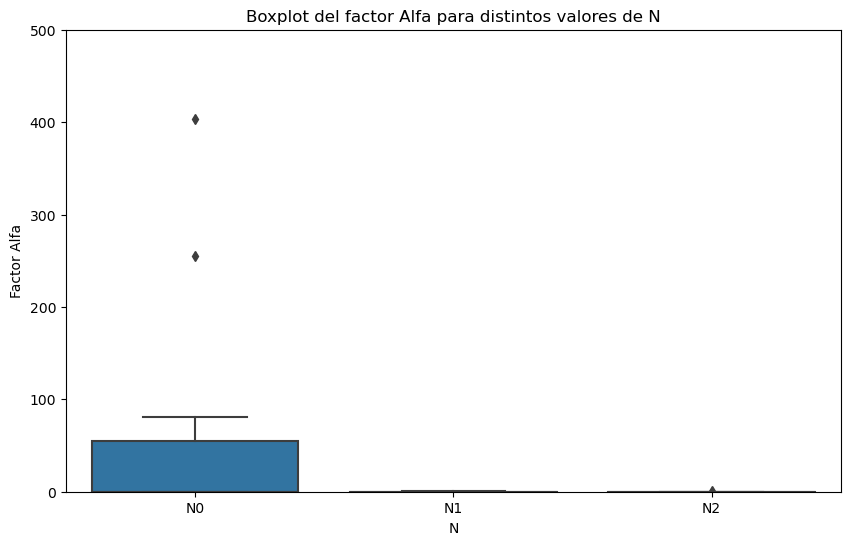

In [73]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='N', y='ALFA', data=TNM[TNM['N'].isin(['N0', 'N2', 'N1'])],order=['N0', 'N1', 'N2'])
plt.title('Boxplot del factor Alfa para distintos valores de N')
plt.xlabel('N')
plt.ylabel('Factor Alfa')
ax.set_ylim(0, 500)
plt.show()

In [74]:
# Test de Mann-Whitney para la variable "BETA"
resultados_ALFA_T = mann_whitney_test(TNM[TNM['T'].isin(['T1', 'T2', 'T3'])], 'T', 'ALFA')
# Test de Mann-Whitney para la variable "BETA"
resultados_ALFA_N = mann_whitney_test(TNM[TNM['N'].isin(['N0', 'N2', 'N1'])], 'N', 'ALFA')


#print("\nResultados para 'ImageMean1':")
#for comparacion, resultados in resultados_imagemean1.items():
    #print(f"Comparación: {comparacion}, Estadístico: {resultados['estadistico']}, p-valor: {resultados['p_valor']}")

print(resultados_ALFA_T)
print(resultados_ALFA_N)

{'T1 vs T2': {0.13675465932437553}, 'T1 vs T3': {0.41303101167374756}, 'T2 vs T3': {0.8490886687683028}}
{'N1 vs N0': {0.9228425027729816}, 'N1 vs N2': {0.3283056812468577}, 'N0 vs N2': {0.1078365010537986}}


### ALFA- Anatomía

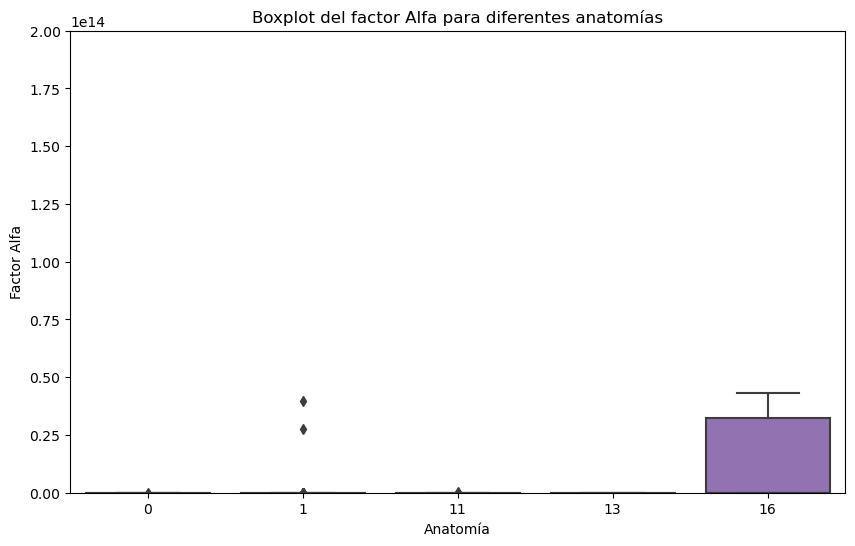

In [75]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='COD_AP', y='ALFA', data=datos.loc[datos['COD_AP'].isin([1, 16, 11, 0,13])])
plt.title('Boxplot del factor Alfa para diferentes anatomías')
plt.xlabel('Anatomía')
plt.ylabel('Factor Alfa')
ax.set_ylim(-0, 200000000000000)
plt.show()

In [76]:
# Test de Mann-Whitney para la variable "BETA"
resultados_ALFA_COD_AP = mann_whitney_test(datos.loc[datos['COD_AP'].isin([1, 16, 11, 0,13])], 'COD_AP', 'ALFA')
resultados_ALFA_COD_AP

{'1 vs 11': {0.06516219674759531},
 '1 vs 0': {0.5432054156614193},
 '1 vs 13': {0.848394005190466},
 '1 vs 16': {0.06787862338620103},
 '11 vs 0': {0.10877913966900417},
 '11 vs 13': {0.3100214290553014},
 '11 vs 16': {0.7534384050496521},
 '0 vs 13': {0.8602588271965479},
 '0 vs 16': {0.28746980247188414},
 '13 vs 16': {0.39673692652166037}}

# Estudio relaciones con la atenuación

## ¿Diferencias significativas entre los tres puntos temporales?

In [77]:
# Realizar el test de Friedman
stat, p_value = friedmanchisquare(datos['ImageMean1'], df['ImageMean2'], df['ImageMean3'])

print(f'Estadístico de Friedman: {stat}')
print(f'Valor p: {p_value}')

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencias significativas entre los grupos.")

Estadístico de Friedman: 6.790273556231232
Valor p: 0.03353596687208053
Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.


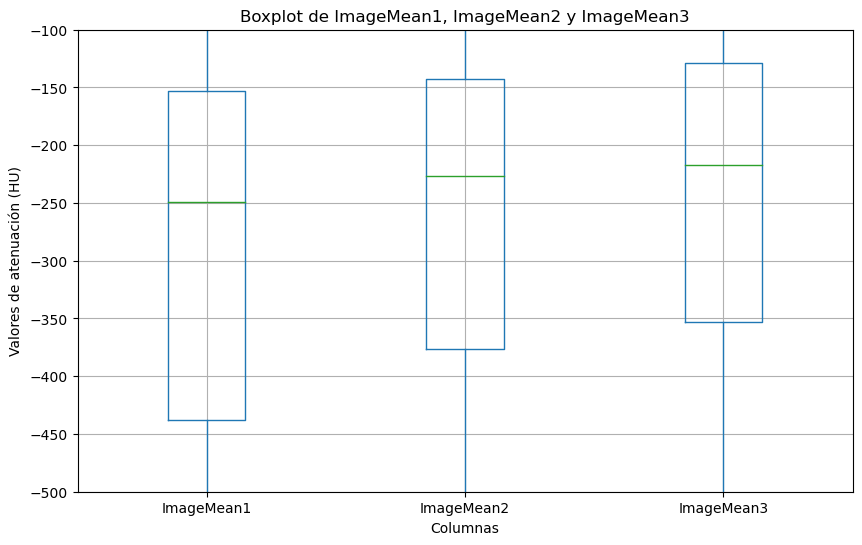

In [78]:
# Suponemos que ya tienes el DataFrame 'datos' cargado con las columnas 'ImageMean1', 'ImageMean2' y 'ImageMean3'

# Crear el boxplot para las columnas especificadas
plt.figure(figsize=(10, 6))
datos[['ImageMean1', 'ImageMean2', 'ImageMean3']].boxplot()
plt.title('Boxplot de ImageMean1, ImageMean2 y ImageMean3')
plt.ylabel('Valores de atenuación (HU)')
plt.xlabel('Columnas')
plt.ylim(-500, -100)
plt.grid(True)
plt.show()


## Coeficiente logarítmico

### Malignidad- coeficiente logarítmico

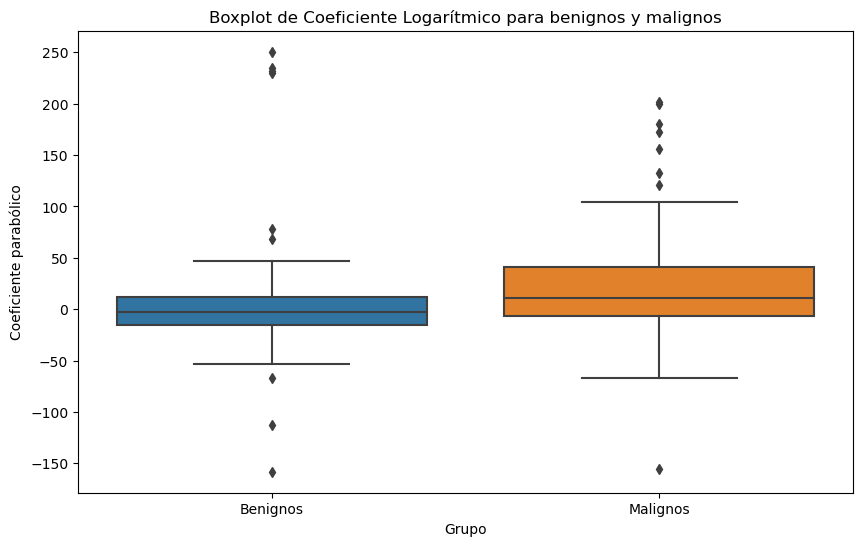

In [79]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='MALIGNO', y='CoefLogAtenuacion', data=datos)
plt.title('Boxplot de Coeficiente Logarítmico para benignos y malignos')
plt.xlabel('Grupo')
plt.ylabel('Coeficiente parabólico')
ax.set_xticklabels(['Benignos' if label == False else 'Malignos' for label in ax.get_xticks()])
#ax.set_ylim(-2, 2)
plt.show()

In [80]:
resultados_factor_log_bm = mann_whitney_test(datos, 'MALIGNO', 'CoefLogAtenuacion')
resultados_factor_log_bm

{'True vs False': {8.088352903621774e-05}}

In [81]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Suponemos que el DataFrame 'datos' ya está cargado
# datos = pd.read_excel('datos.xlsx')

# Función para calcular el intervalo de confianza usando bootstrap
def bootstrap_ci(data, num_samples=1000, ci=95):
    medians = []
    n = len(data)
    
    # Generar muestras bootstrap y calcular la mediana para cada muestra
    for _ in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        medians.append(np.median(sample))
    
    # Calcular el intervalo de confianza
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    ci_lower = np.percentile(medians, lower_percentile)
    ci_upper = np.percentile(medians, upper_percentile)
    
    return (ci_lower, ci_upper)

# Separar datos en benignos y malignos
benignos = datos[datos['MALIGNO'] == 0]
malignos = datos[datos['MALIGNO'] == 1]

# Lista para almacenar resultados
resultados = []

# Análisis para benignos y malignos
for grupo, nombre_grupo in zip([benignos, malignos], ['Benignos', 'Malignos']):
    for columna in ['CoefLogAtenuacion', 'CoefLinearAtenuacion']:
        data_columna = grupo[columna].dropna()  # Asegurarse de no tener valores nulos
        
        # Calcular mediana
        mediana = np.median(data_columna)
        
        # Calcular intervalo de confianza del 95% usando bootstrap
        ic_95 = bootstrap_ci(data_columna)
        
        # Agregar resultados a la lista
        resultados.append([nombre_grupo, columna, mediana, ic_95])
        
# Crear el DataFrame de resultados
resultados_df = pd.DataFrame(resultados, columns=[
    'Grupo', 
    'Columna', 
    'Mediana', 
    'IC 95%'
])

# Mostrar el DataFrame de resultados
print(resultados_df)

# Guardar los resultados en un archivo Excel
resultados_df.to_excel('resultados_medianas_con_ic.xlsx', index=False)


      Grupo               Columna    Mediana  \
0  Benignos     CoefLogAtenuacion  -2.526606   
1  Benignos  CoefLinearAtenuacion  -0.151553   
2  Malignos     CoefLogAtenuacion  10.778279   
3  Malignos  CoefLinearAtenuacion   1.815526   

                                       IC 95%  
0    (-8.207067610025094, 2.0887523188880346)  
1  (-0.9918224062558277, 0.21908992703142668)  
2       (6.5893888103417, 17.022252189237406)  
3    (1.0512351978205887, 2.8567315753456057)  


### Estadio-Coeflog

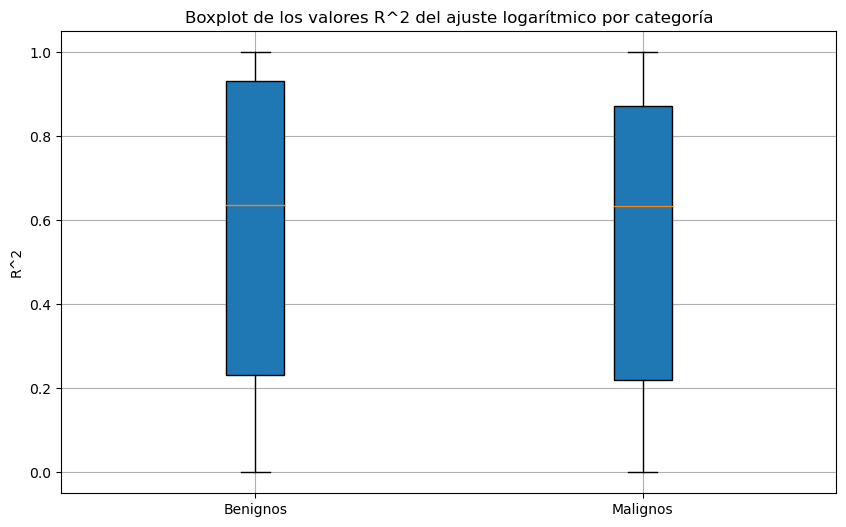

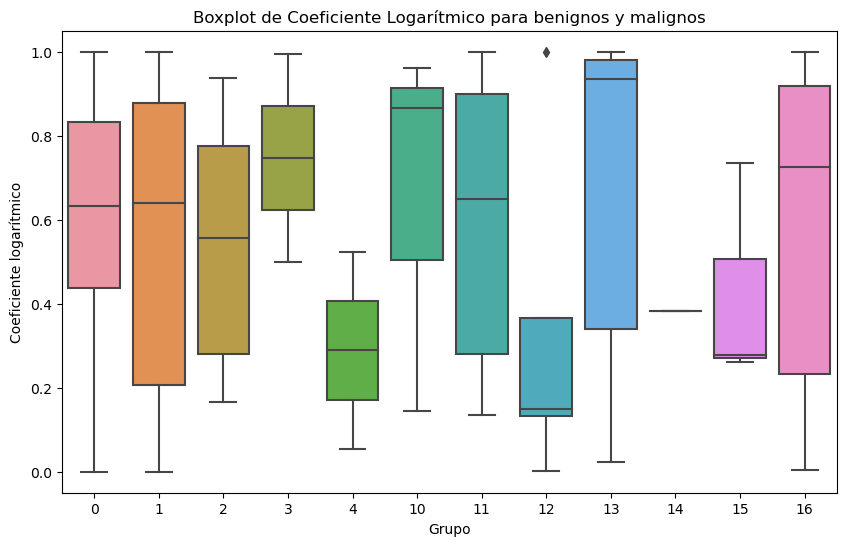

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame 'datos' cargado con las columnas 'ImageMean1', 'ImageMean2', 'ImageMean3', 't1', 't2', y 'Maligno'

# Listas para almacenar los coeficientes a y los valores R^2 calculados
coeficientes_a = []
r2_values = []

# Iterar sobre las filas del dataframe
for index, row in datos.iterrows():
    # Definir los valores conocidos para cada fila
    x0 = 1  # Logarithm of 0 is undefined, so we start at 1
    y0 = row['ImageMean1']
    x1 = row['t1']
    y1 = row['ImageMean2']
    x2 = row['t2']
    y2 = row['ImageMean3']

    # Construir el sistema de ecuaciones lineales para un ajuste logarítmico
    A = np.array([
        [np.log(x0), 1],
        [np.log(x1), 1],
        [np.log(x2), 1]
    ])

    B = np.array([y0, y1, y2])

    # Resolver el sistema de ecuaciones lineales para obtener a y b
    a, b = np.linalg.lstsq(A, B, rcond=None)[0]

    # Calcular los valores ajustados y el R^2
    y_pred = A @ np.array([a, b])
    ss_res = np.sum((B - y_pred) ** 2)
    ss_tot = np.sum((B - np.mean(B)) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    # Almacenar el coeficiente a y el valor R^2 calculado
    coeficientes_a.append(a)
    r2_values.append(r2)

# Añadir la lista de coeficientes a y los valores R^2 como nuevas columnas al dataframe original
datos['CoefLogAtenuacion'] = coeficientes_a
datos['R2_LogAjuste'] = r2_values

# Filtrar los datos por benignos y malignos
benignos = datos[datos['MALIGNO'] == 0]['R2_LogAjuste']
malignos = datos[datos['MALIGNO'] == 1]['R2_LogAjuste']

# Crear un boxplot de los valores R^2 para benignos y malignos
plt.figure(figsize=(10, 6))
plt.boxplot([benignos, malignos], vert=True, patch_artist=True, labels=['Benignos', 'Malignos'])
plt.title('Boxplot de los valores R^2 del ajuste logarítmico por categoría')
plt.ylabel('R^2')
plt.grid(True)
plt.show()

# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='COD_AP', y='R2_LogAjuste', data=datos)
plt.title('Boxplot de Coeficiente Logarítmico para benignos y malignos')
plt.xlabel('Grupo')
plt.ylabel('Coeficiente logarítmico')
#ax.set_ylim(-2, 2)
plt.show()


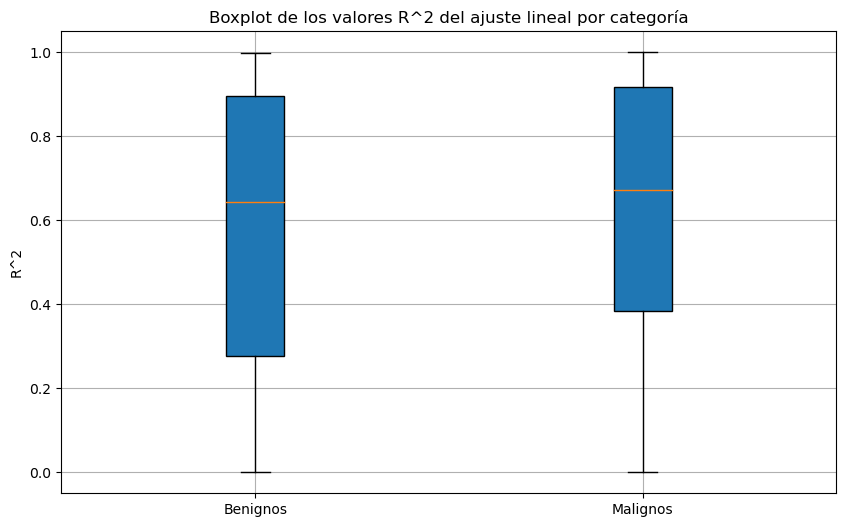

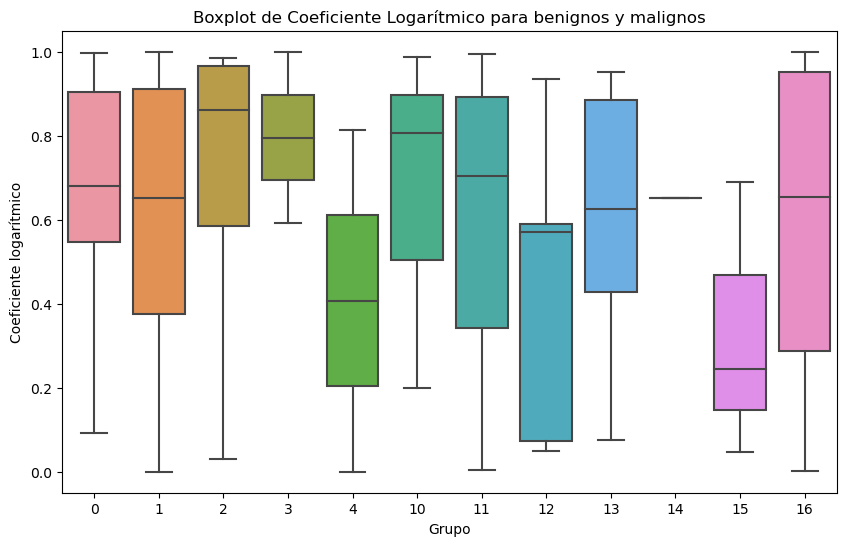

In [83]:
# Supongamos que ya tienes el DataFrame 'datos' cargado con las columnas 'ImageMean1', 'ImageMean2', 'ImageMean3', 't1', 't2', y 'Maligno'

# Listas para almacenar los coeficientes a y los valores R^2 calculados
coeficientes_a = []
r2_values = []

# Iterar sobre las filas del dataframe
for index, row in datos.iterrows():
    # Definir los valores conocidos para cada fila
    x0 = 0
    y0 = row['ImageMean1']
    x1 = row['t1']
    y1 = row['ImageMean2']
    x2 = row['t2']
    y2 = row['ImageMean3']

    # Construir el sistema de ecuaciones lineales para un ajuste lineal
    A = np.array([
        [x0, 1],
        [x1, 1],
        [x2, 1]
    ])

    B = np.array([y0, y1, y2])

    # Resolver el sistema de ecuaciones lineales para obtener a y b
    a, b = np.linalg.lstsq(A, B, rcond=None)[0]

    # Calcular los valores ajustados y el R^2
    y_pred = A @ np.array([a, b])
    ss_res = np.sum((B - y_pred) ** 2)
    ss_tot = np.sum((B - np.mean(B)) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    # Almacenar el coeficiente a y el valor R^2 calculado
    coeficientes_a.append(a)
    r2_values.append(r2)

# Añadir la lista de coeficientes a y los valores R^2 como nuevas columnas al dataframe original
datos['CoefLinAtenuacion'] = coeficientes_a
datos['R2_LinAjuste'] = r2_values

# Filtrar los datos por benignos y malignos
benignos = datos[datos['MALIGNO'] == 0]['R2_LinAjuste']
malignos = datos[datos['MALIGNO'] == 1]['R2_LinAjuste']

# Crear un boxplot de los valores R^2 para benignos y malignos
plt.figure(figsize=(10, 6))
plt.boxplot([benignos, malignos], vert=True, patch_artist=True, labels=['Benignos', 'Malignos'])
plt.title('Boxplot de los valores R^2 del ajuste lineal por categoría')
plt.ylabel('R^2')
plt.grid(True)
plt.show()

# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='COD_AP', y='R2_LinAjuste', data=datos)
plt.title('Boxplot de Coeficiente Logarítmico para benignos y malignos')
plt.xlabel('Grupo')
plt.ylabel('Coeficiente logarítmico')
#ax.set_ylim(-2, 2)
plt.show()



In [84]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='Estadio', y='CoefLogAtenuacion', data=malignos)
plt.title('Boxplot de Coeficiente Logarítmico para Estadios')
plt.xlabel('Grupo')
plt.ylabel('Coeficiente logarítmico')
#ax.set_ylim(-2, 2)
plt.show()

ValueError: Could not interpret input 'Estadio'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Supongamos que ya tienes el DataFrame 'malignos' cargado

# Filtrar los datos para incluir solo los valores I, II y III en la columna 'Estadio'
malignos_filtrados = malignos[malignos['Estadio'].isin(['I', 'II', 'III'])]

# Agrupar los valores de 'BETA' según el 'Estadio'
grupo_I = malignos_filtrados[malignos_filtrados['Estadio'] == 'I']['CoefLogAtenuacion']
grupo_II = malignos_filtrados[malignos_filtrados['Estadio'] == 'II']['CoefLogAtenuacion']
grupo_III = malignos_filtrados[malignos_filtrados['Estadio'] == 'III']['CoefLogAtenuacion']

# Realizar el test de Kruskal-Wallis
stat, p_value = kruskal(grupo_I, grupo_II, grupo_III)

# Mostrar los resultados
print(f"Estadístico de Kruskal-Wallis: {stat}")
print(f"Valor p: {p_value}")

# Interpretación del resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: No hay una diferencia significativa entre los grupos.")


Estadístico de Kruskal-Wallis: 1.8159597387369786
Valor p: 0.40333819743802124
No se rechaza la hipótesis nula: No hay una diferencia significativa entre los grupos.


## Coeficiente lineal

### Malignidad-coef. lineal

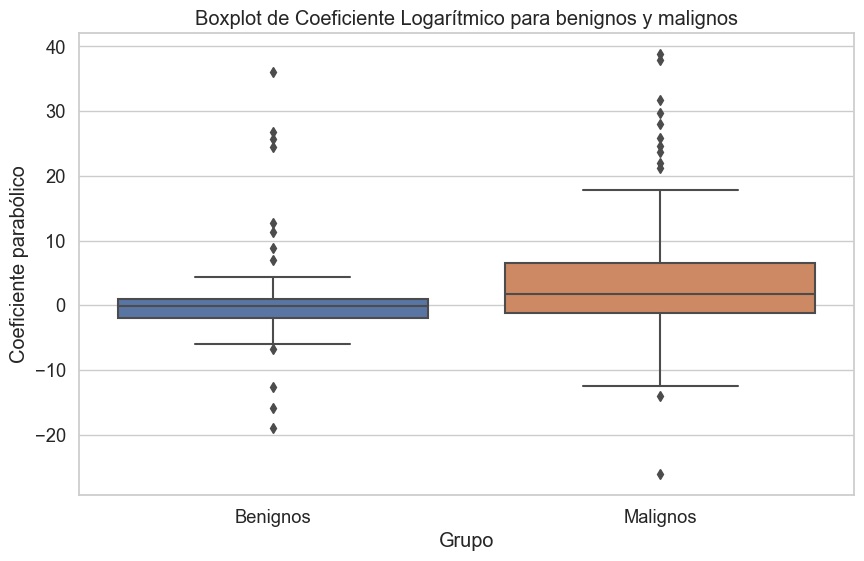

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='MALIGNO', y='CoefLinearAtenuacion', data=datos)
plt.title('Boxplot de Coeficiente Logarítmico para benignos y malignos')
plt.xlabel('Grupo')
plt.ylabel('Coeficiente parabólico')
ax.set_xticklabels(['Benignos' if label == False else 'Malignos' for label in ax.get_xticks()])
#ax.set_ylim(-2, 2)
plt.show()

In [ ]:
resultados_factor_lin_bm = mann_whitney_test(datos, 'MALIGNO', 'CoefLinearAtenuacion')
resultados_factor_lin_bm

{'True vs False': {5.269821918420233e-05}}

### Malignidad-Estadio

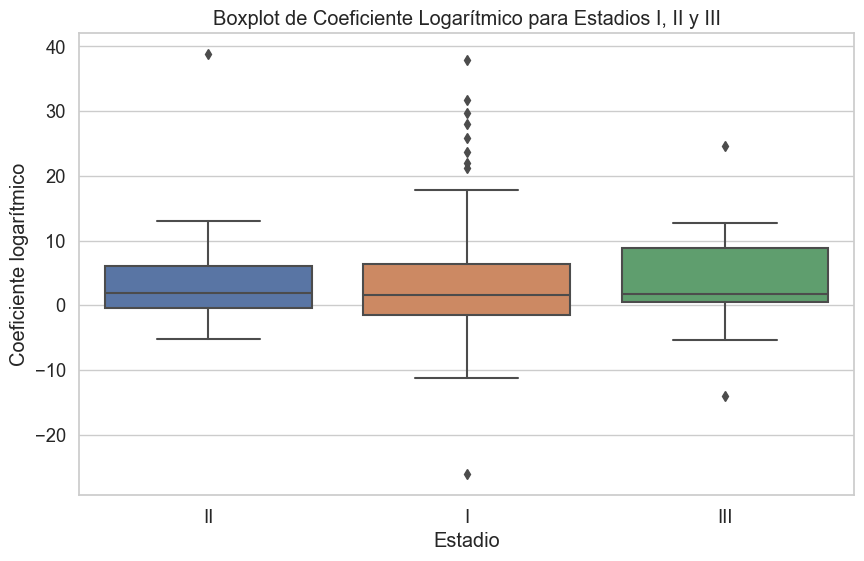

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Estadio', y='CoefLinearAtenuacion', data=malignos[malignos['Estadio'].isin(['I', 'II', 'III'])])
plt.title('Boxplot de Coeficiente Logarítmico para Estadios I, II y III')
plt.xlabel('Estadio')
plt.ylabel('Coeficiente logarítmico')
#plt.ylim(-2, 2)  # Si quieres establecer límites en el eje y, descomentar esta línea
plt.show()


In [ ]:
# Supongamos que ya tienes el DataFrame 'malignos' cargado

# Filtrar los datos para incluir solo los valores I, II y III en la columna 'Estadio'
malignos_filtrados = malignos[malignos['Estadio'].isin(['I', 'II', 'III'])]

# Agrupar los valores de 'BETA' según el 'Estadio'
grupo_I = malignos_filtrados[malignos_filtrados['Estadio'] == 'I']['CoefLinearAtenuacion']
grupo_II = malignos_filtrados[malignos_filtrados['Estadio'] == 'II']['CoefLinearAtenuacion']
grupo_III = malignos_filtrados[malignos_filtrados['Estadio'] == 'III']['CoefLinearAtenuacion']

# Realizar el test de Kruskal-Wallis
stat, p_value = kruskal(grupo_I, grupo_II, grupo_III)

# Mostrar los resultados
print(f"Estadístico de Kruskal-Wallis: {stat}")
print(f"Valor p: {p_value}")

# Interpretación del resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: No hay una diferencia significativa entre los grupos.")

Estadístico de Kruskal-Wallis: 0.5422283195624686
Valor p: 0.7625294412418638
No se rechaza la hipótesis nula: No hay una diferencia significativa entre los grupos.


## Coeficiente parabólico

### Malignidad-coeficiente parabólico

In [ ]:
# Realizar el test de Mann-Whitney
stat, p_value = mannwhitneyu(benignos['CoefParabolAtenuacion'], malignos['CoefParabolAtenuacion'])

# Mostrar los resultados
print("Estadístico de prueba:", stat)
print("p-valor:", p_value)

if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos 'benignos' y 'malignos'.")
else:
    print("No hay diferencias significativas entre los grupos 'benignos' y 'malignos'.")

Estadístico de prueba: 6008.0
p-valor: 0.02236121636729951
Hay diferencias significativas entre los grupos 'benignos' y 'malignos'.


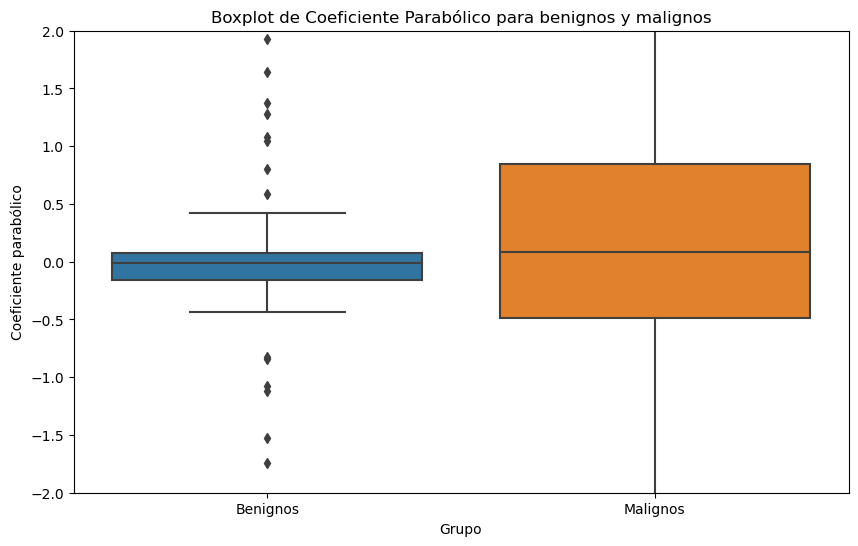

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='MALIGNO', y='CoefParabolAtenuacion', data=datos)
plt.title('Boxplot de Coeficiente Parabólico para benignos y malignos')
plt.xlabel('Grupo')
plt.ylabel('Coeficiente parabólico')
ax.set_xticklabels(['Benignos' if label == False else 'Malignos' for label in ax.get_xticks()])
ax.set_ylim(-2, 2)
plt.show()

### Estadio vs Factor parabolico

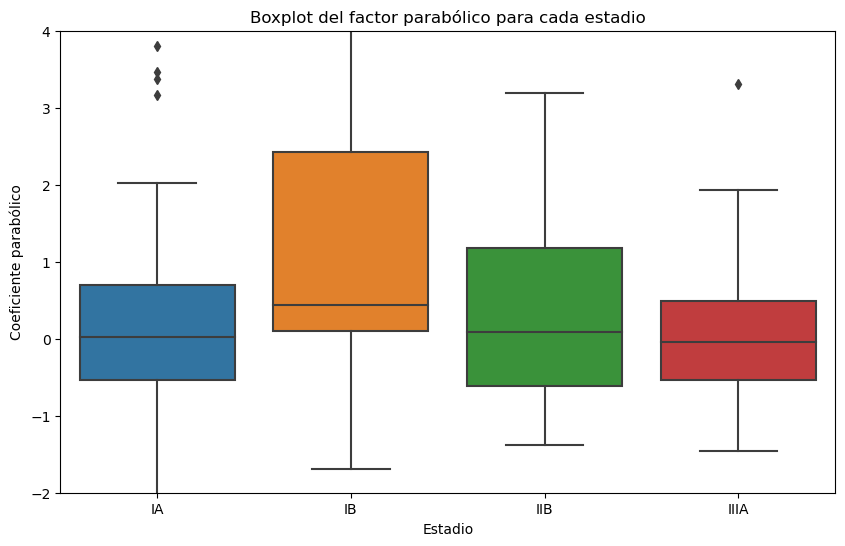

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='Estadio', y='CoefParabolAtenuacion', data=malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], order=['IA', 'IB', 'IIB', 'IIIA'])
plt.title('Boxplot del factor parabólico para cada estadio')
plt.xlabel('Estadio')
plt.ylabel('Coeficiente parabólico')
ax.set_ylim(-2, 4)
plt.show()

In [ ]:
resultados_factor_a_Estadio = mann_whitney_test(malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], 'Estadio', 'CoefParabolAtenuacion')
resultados_factor_a_Estadio

{'IB vs IIB': {0.22373076260023583},
 'IB vs IA': {0.08695718977011943},
 'IB vs IIIA': {0.18158360358737913},
 'IIB vs IA': {0.8008059449566216},
 'IIB vs IIIA': {0.7952497535349383},
 'IA vs IIIA': {0.8558722660240021}}

### TNM vs factor parabólico

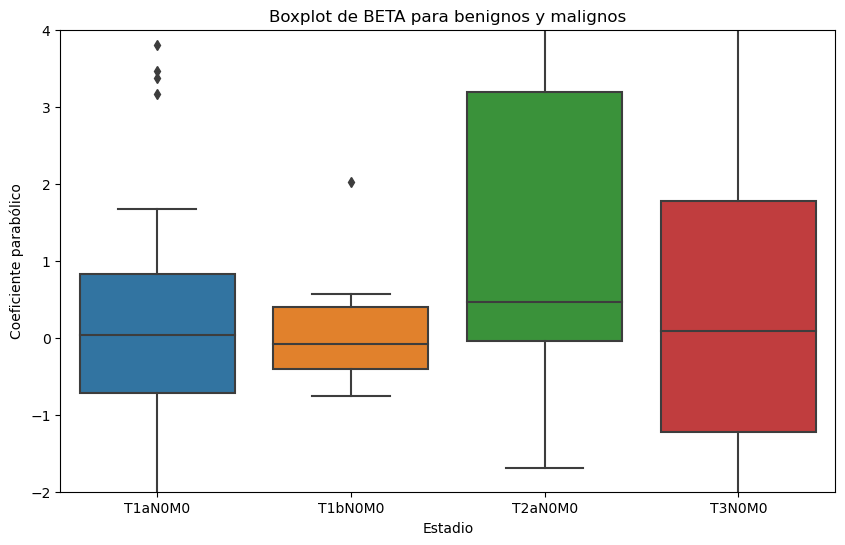

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='TNM', y='CoefParabolAtenuacion', data=malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])], order=['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])
plt.title('Boxplot de BETA para benignos y malignos')
plt.xlabel('Estadio')
plt.ylabel('Coeficiente parabólico')
ax.set_ylim(-2, 4)
plt.show()

In [ ]:
resultados_factor_a_TNM = mann_whitney_test(malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])], 'TNM', 'CoefParabolAtenuacion')
resultados_factor_a_TNM

{'T2aN0M0 vs T3N0M0': {0.2614114471699611},
 'T2aN0M0 vs T1aN0M0': {0.11856204214789777},
 'T2aN0M0 vs T1bN0M0': {0.14415230644213756},
 'T3N0M0 vs T1aN0M0': {0.9190351013531756},
 'T3N0M0 vs T1bN0M0': {0.7007197836488454},
 'T1aN0M0 vs T1bN0M0': {0.9737909557193204}}

#### Comparación entre T y N

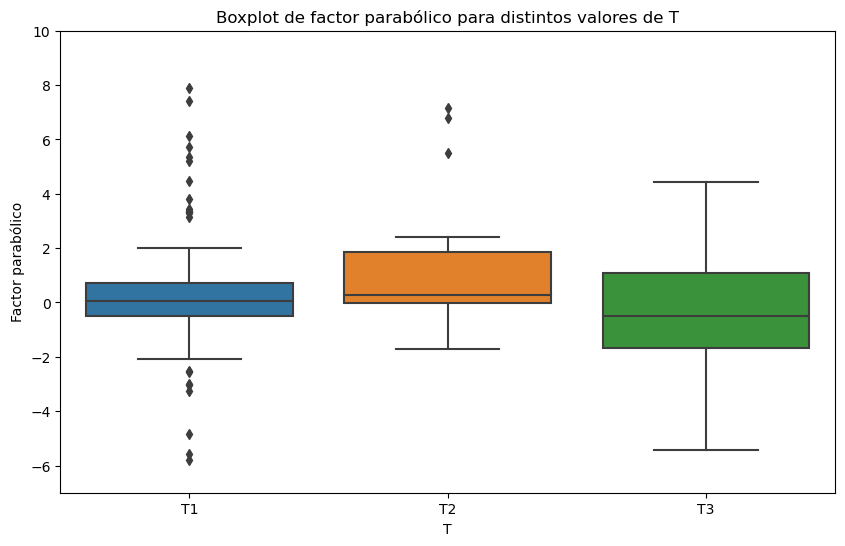

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='T', y='CoefParabolAtenuacion', data=TNM[TNM['T'].isin(['T1', 'T2', 'T3'])],order=['T1', 'T2', 'T3'])
plt.title('Boxplot de factor parabólico para distintos valores de T')
plt.xlabel('T')
plt.ylabel('Factor parabólico')
ax.set_ylim(-7, 10)
plt.show()

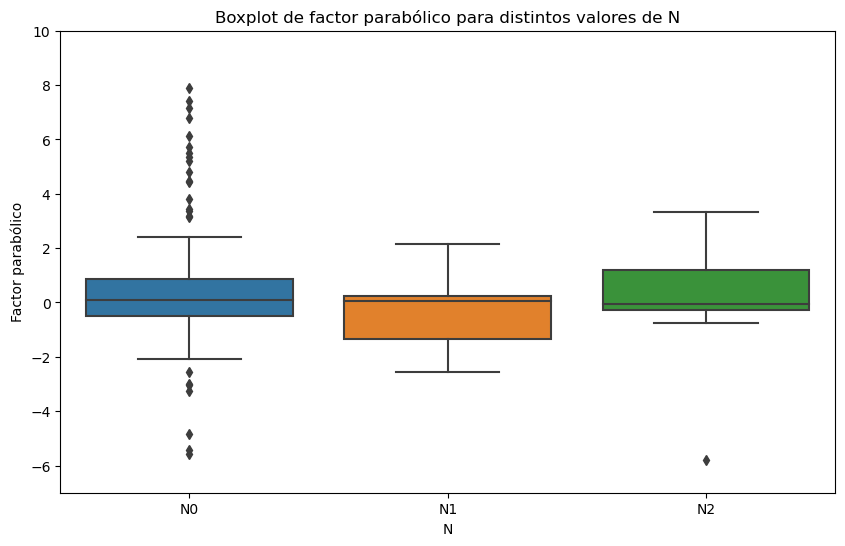

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='N', y='CoefParabolAtenuacion', data=TNM[TNM['N'].isin(['N0', 'N2', 'N1'])],order=['N0', 'N1', 'N2'])
plt.title('Boxplot de factor parabólico para distintos valores de N')
plt.xlabel('N')
plt.ylabel('Factor parabólico')
ax.set_ylim(-7, 10)
plt.show()

In [ ]:
# Test de Mann-Whitney para la variable "BETA"
resultados_a_T = mann_whitney_test(TNM[TNM['T'].isin(['T1', 'T2', 'T3'])], 'T', 'CoefParabolAtenuacion')
# Test de Mann-Whitney para la variable "BETA"
resultados_a_N = mann_whitney_test(TNM[TNM['N'].isin(['N0', 'N2', 'N1'])], 'N', 'CoefParabolAtenuacion')


#print("\nResultados para 'ImageMean1':")
#for comparacion, resultados in resultados_imagemean1.items():
    #print(f"Comparación: {comparacion}, Estadístico: {resultados['estadistico']}, p-valor: {resultados['p_valor']}")

print(resultados_a_T)
print(resultados_a_N)
#resultados_imagemean1

{'T1 vs T2': {0.15354486113372406}, 'T1 vs T3': {0.47041047625773885}, 'T2 vs T3': {0.19608839672912898}}
{'N1 vs N0': {0.4771224107782288}, 'N1 vs N2': {0.8601055806938159}, 'N0 vs N2': {0.8989071950275059}}


### Codigo AP- Coef parabólico

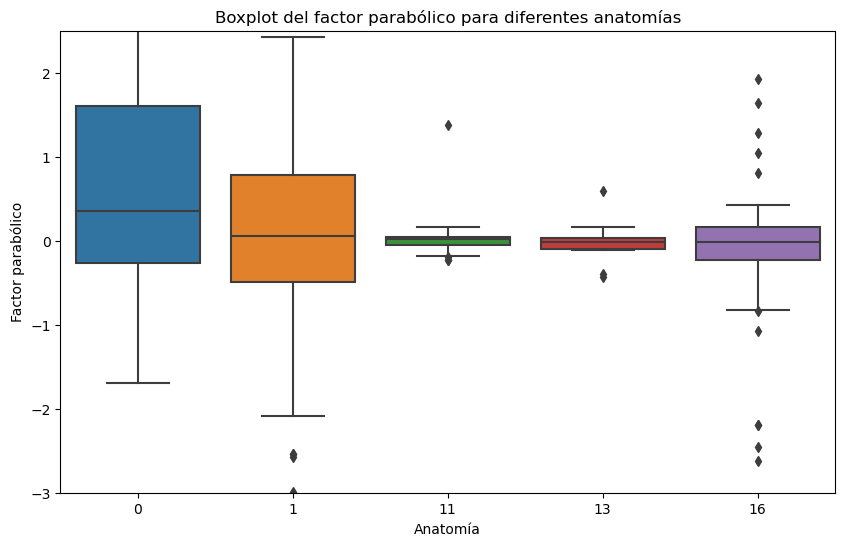

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='COD_AP', y='CoefParabolAtenuacion', data=datos.loc[datos['COD_AP'].isin([1, 16, 11, 0,13])])
plt.title('Boxplot del factor parabólico para diferentes anatomías')
plt.xlabel('Anatomía')
plt.ylabel('Factor parabólico')
ax.set_ylim(-3, 2.5)
plt.show()

In [ ]:
# Test de Mann-Whitney para la variable "BETA"
resultados_a_COD_AP = mann_whitney_test(datos.loc[datos['COD_AP'].isin([1, 16, 11, 0,13])], 'COD_AP', 'CoefParabolAtenuacion')
resultados_a_COD_AP

{'1 vs 11': {0.20726876485355772},
 '1 vs 0': {0.614141396678396},
 '1 vs 13': {0.45617380976363164},
 '1 vs 16': {0.17925140528930428},
 '11 vs 0': {0.20055726867106483},
 '11 vs 13': {0.48219166095493815},
 '11 vs 16': {0.9681113334753255},
 '0 vs 13': {0.3072263700681952},
 '0 vs 16': {0.22352408460563467},
 '13 vs 16': {0.8983864284301155}}

## ImageMean1

### ImageMean1- Malignidad

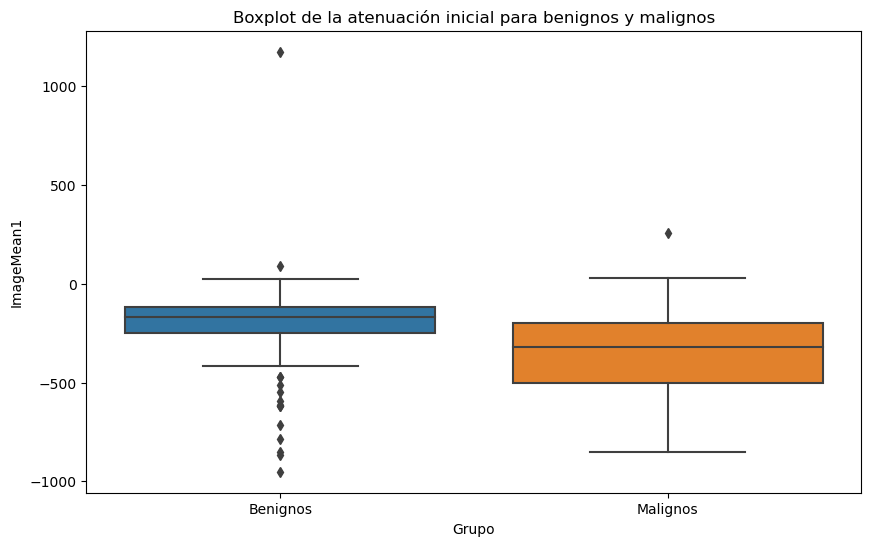

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='MALIGNO', y='ImageMean1', data=datos)
plt.title('Boxplot de la atenuación inicial para benignos y malignos')
plt.xlabel('Grupo')
plt.ylabel('ImageMean1')
ax.set_xticklabels(['Benignos' if label == False else 'Malignos' for label in ax.get_xticks()])
# ax.set_ylim(-7, 10)
plt.show()

In [ ]:
# Test de Mann-Whitney para la variable "ImageMean1"
resultados_imagemean1 = mannwhitneyu(benignos['ImageMean1'], malignos['ImageMean1'])
resultados_imagemean1

MannwhitneyuResult(statistic=10162.0, pvalue=1.541525084354722e-07)

Hay diferencias significativa en la atenuación inicial entre malignos y benignos.

### ImageMean1-Estadio

In [ ]:
malignos['ImageMean1'].dropna(inplace=True)

C:\Users\Ana Belén\AppData\Local\Temp\ipykernel_26728\1311243577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malignos['ImageMean1'].dropna(inplace=True)


In [ ]:
import pandas as pd
from scipy.stats import kruskal

# Suponemos que el DataFrame 'malignos' ya está cargado
# malignos = pd.read_excel('malignos.xlsx')

# Filtrar los datos para incluir solo los valores I, II y III en la columna 'Estadio'
malignos_filtrados = malignos[malignos['Estadio'].isin(['I', 'II', 'III'])]

# Agrupar los valores de 'ImageMean1' según el 'Estadio' y eliminar NaN
grupo_I = malignos_filtrados[malignos_filtrados['Estadio'] == 'I']['ImageMean1'].dropna()
grupo_II = malignos_filtrados[malignos_filtrados['Estadio'] == 'II']['ImageMean1'].dropna()
grupo_III = malignos_filtrados[malignos_filtrados['Estadio'] == 'III']['ImageMean1'].dropna()

# Verificar las estadísticas descriptivas de cada grupo
print("Estadísticas descriptivas del grupo I:")
print(grupo_I.describe())

print("\nEstadísticas descriptivas del grupo II:")
print(grupo_II.describe())

print("\nEstadísticas descriptivas del grupo III:")
print(grupo_III.describe())

# Verificar que no hay valores infinitos
print("\nVerificación de valores infinitos:")
print(f"Grupo I - Infinitos: {np.isinf(grupo_I).sum()}")
print(f"Grupo II - Infinitos: {np.isinf(grupo_II).sum()}")
print(f"Grupo III - Infinitos: {np.isinf(grupo_III).sum()}")

# Realizar el test de Kruskal-Wallis
stat, p_value = kruskal(grupo_I, grupo_II, grupo_III)

# Mostrar los resultados
print(f"\nEstadístico de Kruskal-Wallis: {stat}")
print(f"Valor p: {p_value}")

# Interpretación del resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: No hay una diferencia significativa entre los grupos.")


Estadísticas descriptivas del grupo I:
count    121.000000
mean    -360.574522
std      190.988572
min     -749.829000
25%     -516.201000
50%     -339.739100
75%     -220.498000
max       27.683300
Name: ImageMean1, dtype: float64

Estadísticas descriptivas del grupo II:
count     15.000000
mean    -290.816545
std      243.558308
min     -852.896000
25%     -346.256500
50%     -234.019000
75%     -147.085500
max        6.089730
Name: ImageMean1, dtype: float64

Estadísticas descriptivas del grupo III:
count     17.000000
mean    -250.139382
std      216.821736
min     -619.364000
25%     -415.650000
50%     -220.397000
75%     -130.083300
max      257.872000
Name: ImageMean1, dtype: float64

Verificación de valores infinitos:
Grupo I - Infinitos: 0
Grupo II - Infinitos: 0
Grupo III - Infinitos: 0

Estadístico de Kruskal-Wallis: 6.246823224214609
Valor p: 0.04400677797209128
Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos.


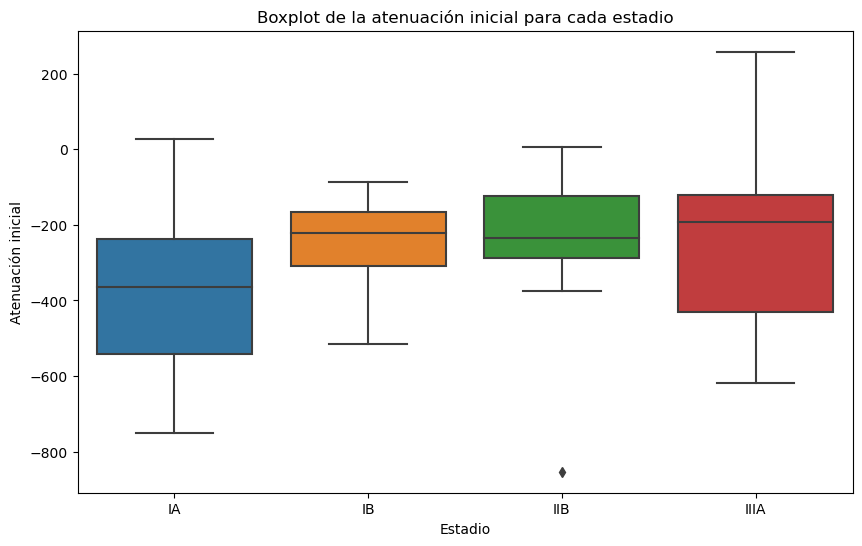

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='Estadio', y='ImageMean1', data=malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], order=['IA', 'IB', 'IIB', 'IIIA'])
plt.title('Boxplot de la atenuación inicial para cada estadio')
plt.xlabel('Estadio')
plt.ylabel('Atenuación inicial')
# ax.set_ylim(-2, 4)
plt.show()

In [ ]:
resultados_im1_Estadio = mann_whitney_test(malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], 'Estadio', 'ImageMean1')
resultados_im1_Estadio

{'IB vs IIB': {0.6850689949718154},
 'IB vs IA': {0.034563702376288634},
 'IB vs IIIA': {0.8900854910841072},
 'IIB vs IA': {0.027347969590129407},
 'IIB vs IIIA': {0.8355415242251893},
 'IA vs IIIA': {0.05575791768885439}}

### TNM- ImageMean1

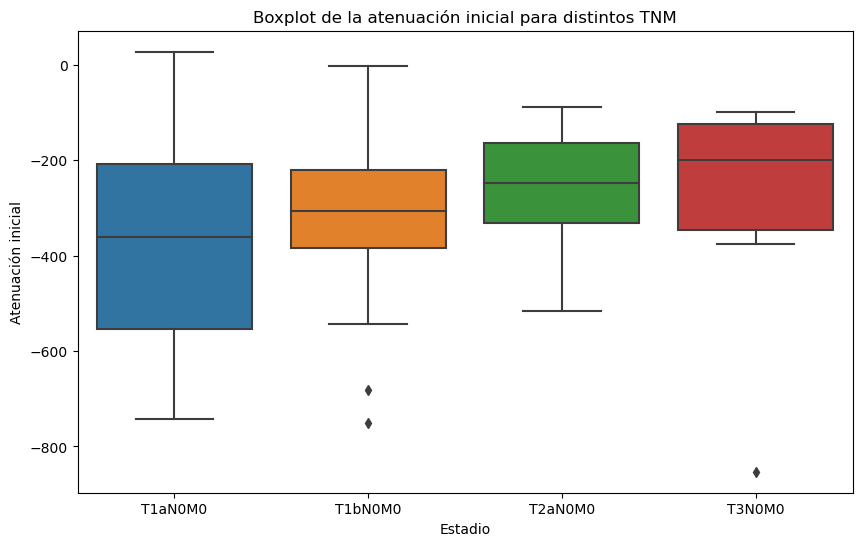

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='TNM', y='ImageMean1', data=malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])], order=['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])
plt.title('Boxplot de la atenuación inicial para distintos TNM')
plt.xlabel('Estadio')
plt.ylabel('Atenuación inicial')
#ax.set_ylim(-2, 4)
plt.show()

In [ ]:
resultados_factor_im1_TNM = mann_whitney_test(malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])], 'TNM', 'ImageMean1')
resultados_factor_im1_TNM

{'T2aN0M0 vs T3N0M0': {0.9018020163530999},
 'T2aN0M0 vs T1aN0M0': {0.08205586245452276},
 'T2aN0M0 vs T1bN0M0': {0.3198168473325793},
 'T3N0M0 vs T1aN0M0': {0.2458240523533861},
 'T3N0M0 vs T1bN0M0': {0.38897857291449967},
 'T1aN0M0 vs T1bN0M0': {0.48435053571286646}}

#### Comparación entre T y N

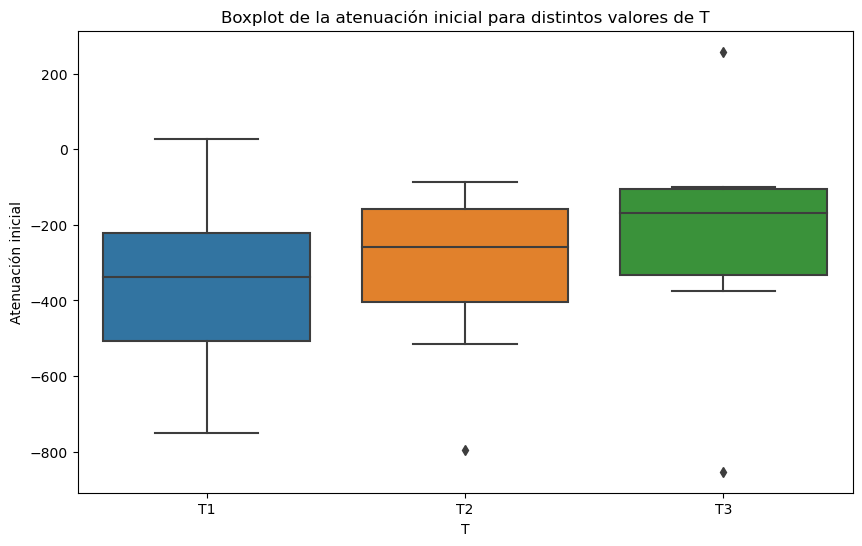

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='T', y='ImageMean1', data=TNM[TNM['T'].isin(['T1', 'T2', 'T3'])],order=['T1', 'T2', 'T3'])
plt.title('Boxplot de la atenuación inicial para distintos valores de T')
plt.xlabel('T')
plt.ylabel('Atenuación inicial')
#ax.set_ylim(-7, 10)
plt.show()

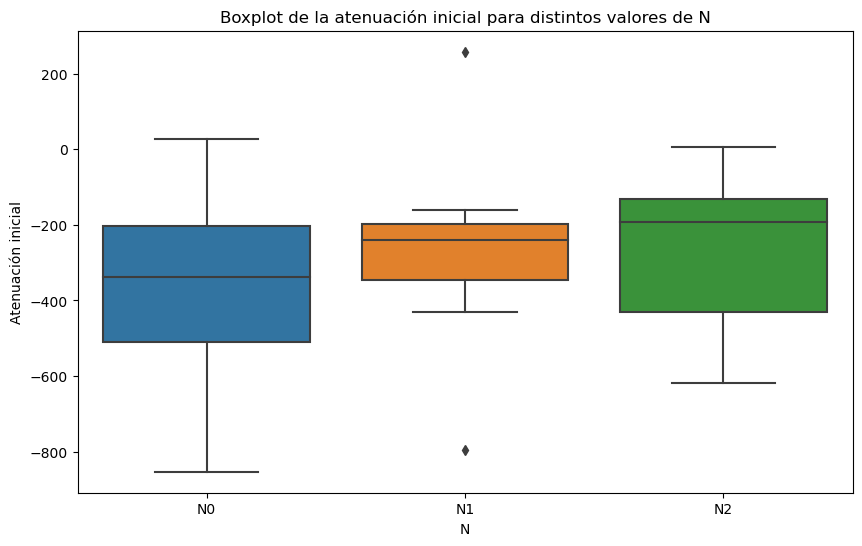

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='N', y='ImageMean1', data=TNM[TNM['N'].isin(['N0', 'N2', 'N1'])],order=['N0', 'N1', 'N2'])
plt.title('Boxplot de la atenuación inicial para distintos valores de N')
plt.xlabel('N')
plt.ylabel('Atenuación inicial')
#ax.set_ylim(-7, 10)
plt.show()

In [ ]:
# Test de Mann-Whitney para la variable "BETA"
resultados_im1_T = mann_whitney_test(TNM[TNM['T'].isin(['T1', 'T2', 'T3'])], 'T', 'ImageMean1')
# Test de Mann-Whitney para la variable "BETA"
resultados_im1_N = mann_whitney_test(TNM[TNM['N'].isin(['N0', 'N2', 'N1'])], 'N', 'ImageMean1')


#print("\nResultados para 'ImageMean1':")
#for comparacion, resultados in resultados_imagemean1.items():
    #print(f"Comparación: {comparacion}, Estadístico: {resultados['estadistico']}, p-valor: {resultados['p_valor']}")

print(resultados_im1_T)
print(resultados_im1_N)
#resultados_imagemean1

{'T1 vs T2': {0.18764527540840237}, 'T1 vs T3': {0.08966087525245352}, 'T2 vs T3': {0.36701092957385867}}
{'N1 vs N0': {0.37135382363001757}, 'N1 vs N2': {0.7914152840623428}, 'N0 vs N2': {0.12468738884594063}}


### Anatomía-ImageMean1

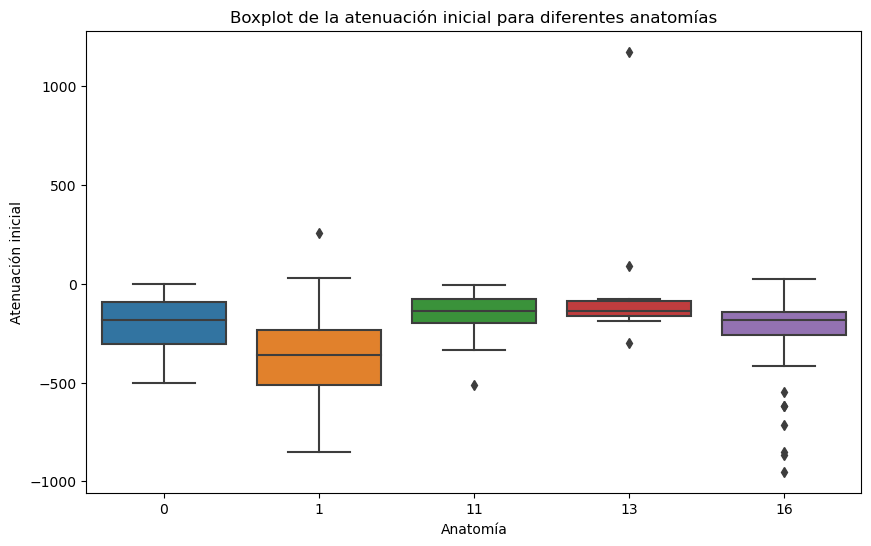

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='COD_AP', y='ImageMean1', data=datos.loc[datos['COD_AP'].isin([1, 16, 11, 0,13])])
plt.title('Boxplot de la atenuación inicial para diferentes anatomías')
plt.xlabel('Anatomía')
plt.ylabel('Atenuación inicial')
#ax.set_ylim(-10, 10)
plt.show()

In [ ]:
# Test de Mann-Whitney para la variable "BETA"
resultados_im1_COD_AP = mann_whitney_test(datos.loc[datos['COD_AP'].isin([1, 16, 11, 0,13])], 'COD_AP', 'ImageMean1')
resultados_im1_COD_AP

{'1 vs 11': {3.281137931770033e-09},
 '1 vs 0': {0.0065077050527742675},
 '1 vs 13': {5.762913713568865e-05},
 '1 vs 16': {9.831554889140773e-05},
 '11 vs 0': {0.38536127326846936},
 '11 vs 13': {0.7906182641736684},
 '11 vs 16': {0.006226626531933344},
 '0 vs 13': {0.3072263700681952},
 '0 vs 16': {0.39846193139691855},
 '13 vs 16': {0.02087662948523082}}

Diferencias significativas entre Adenocarcinoma y Epidermoide.

## ImageMean3

### Atenuación final-malignidad

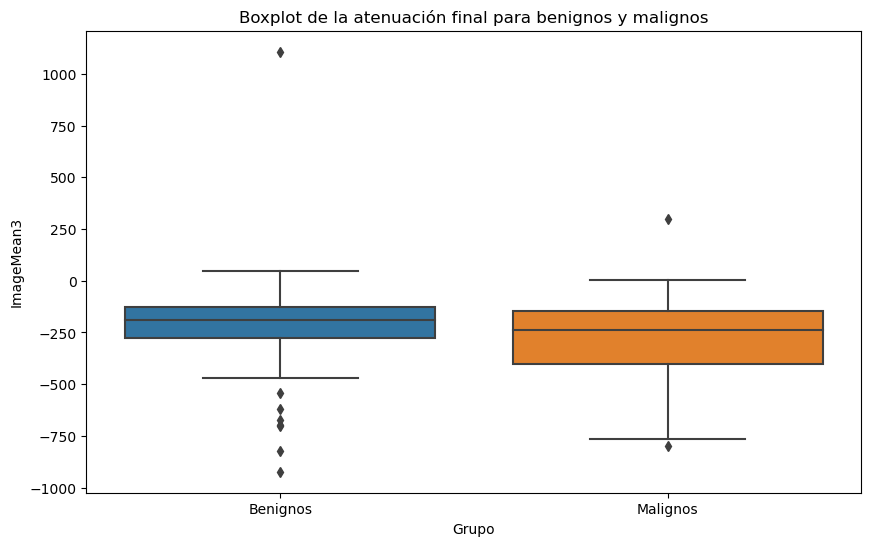

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='MALIGNO', y='ImageMean3', data=datos)
plt.title('Boxplot de la atenuación final para benignos y malignos')
plt.xlabel('Grupo')
plt.ylabel('ImageMean3')
ax.set_xticklabels(['Benignos' if label == False else 'Malignos' for label in ax.get_xticks()])
# ax.set_ylim(-7, 10)
plt.show()

In [ ]:
# Test de Mann-Whitney para la variable "ImageMean1"
resultados_imagemean3 = mannwhitneyu(benignos['ImageMean3'], malignos['ImageMean3'])
resultados_imagemean3

MannwhitneyuResult(statistic=8661.0, pvalue=0.011557352047406473)

### Atenuación final-Estadio

In [ ]:
import pandas as pd
from scipy.stats import kruskal

# Suponemos que el DataFrame 'malignos' ya está cargado
# malignos = pd.read_excel('malignos.xlsx')

# Filtrar los datos para incluir solo los valores I, II y III en la columna 'Estadio'
malignos_filtrados = malignos[malignos['Estadio'].isin(['I', 'II', 'III'])]

# Agrupar los valores de 'ImageMean1' según el 'Estadio' y eliminar NaN
grupo_I = malignos_filtrados[malignos_filtrados['Estadio'] == 'I']['ImageMean3'].dropna()
grupo_II = malignos_filtrados[malignos_filtrados['Estadio'] == 'II']['ImageMean3'].dropna()
grupo_III = malignos_filtrados[malignos_filtrados['Estadio'] == 'III']['ImageMean3'].dropna()

# Verificar las estadísticas descriptivas de cada grupo
print("Estadísticas descriptivas del grupo I:")
print(grupo_I.describe())

print("\nEstadísticas descriptivas del grupo II:")
print(grupo_II.describe())

print("\nEstadísticas descriptivas del grupo III:")
print(grupo_III.describe())

# Verificar que no hay valores infinitos
print("\nVerificación de valores infinitos:")
print(f"Grupo I - Infinitos: {np.isinf(grupo_I).sum()}")
print(f"Grupo II - Infinitos: {np.isinf(grupo_II).sum()}")
print(f"Grupo III - Infinitos: {np.isinf(grupo_III).sum()}")

# Realizar el test de Kruskal-Wallis
stat, p_value = kruskal(grupo_I, grupo_II, grupo_III)

# Mostrar los resultados
print(f"\nEstadístico de Kruskal-Wallis: {stat}")
print(f"Valor p: {p_value}")

# Interpretación del resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: No hay una diferencia significativa entre los grupos.")


Estadísticas descriptivas del grupo I:
count    121.000000
mean    -303.125247
std      182.250176
min     -767.165000
25%     -443.747000
50%     -269.848000
75%     -176.979000
max        3.833900
Name: ImageMean3, dtype: float64

Estadísticas descriptivas del grupo II:
count     15.000000
mean    -179.054480
std      194.623521
min     -799.355000
25%     -177.082500
50%     -113.836000
75%      -83.266500
max      -17.120300
Name: ImageMean3, dtype: float64

Estadísticas descriptivas del grupo III:
count     17.000000
mean    -165.528004
std      202.184865
min     -634.399000
25%     -246.065600
50%     -139.372000
75%      -57.501900
max      295.788000
Name: ImageMean3, dtype: float64

Verificación de valores infinitos:
Grupo I - Infinitos: 0
Grupo II - Infinitos: 0
Grupo III - Infinitos: 0

Estadístico de Kruskal-Wallis: 14.90631475406559
Valor p: 0.0005796086769580266
Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos.


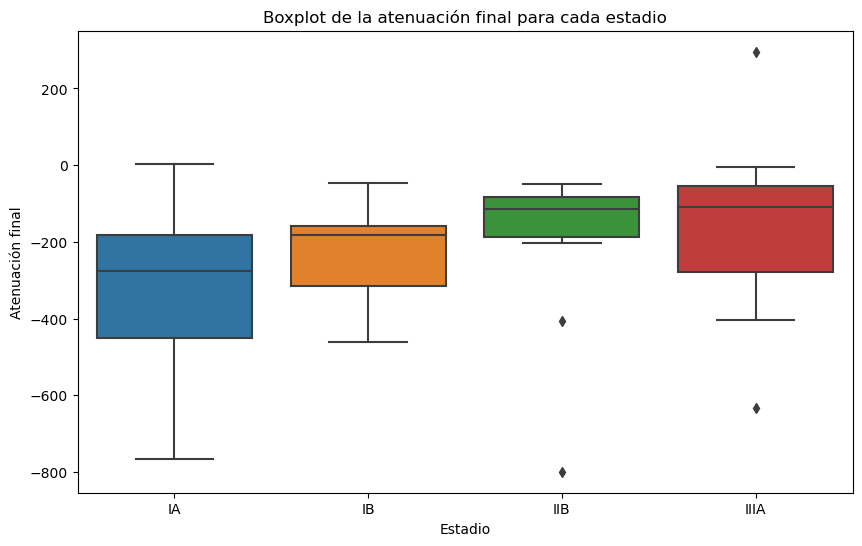

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='Estadio', y='ImageMean3', data=malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], order=['IA', 'IB', 'IIB', 'IIIA'])
plt.title('Boxplot de la atenuación final para cada estadio')
plt.xlabel('Estadio')
plt.ylabel('Atenuación final')
# ax.set_ylim(-2, 4)
plt.show()

In [ ]:
resultados_im3_Estadio = mann_whitney_test(malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], 'Estadio', 'ImageMean3')
resultados_im3_Estadio

{'IB vs IIB': {0.32466273916196375},
 'IB vs IA': {0.12050890988774496},
 'IB vs IIIA': {0.2494716685110525},
 'IIB vs IA': {0.01860711196597022},
 'IIB vs IIIA': {0.7554968749288828},
 'IA vs IIIA': {0.010402416280933201}}

### Atenuación final-TNM

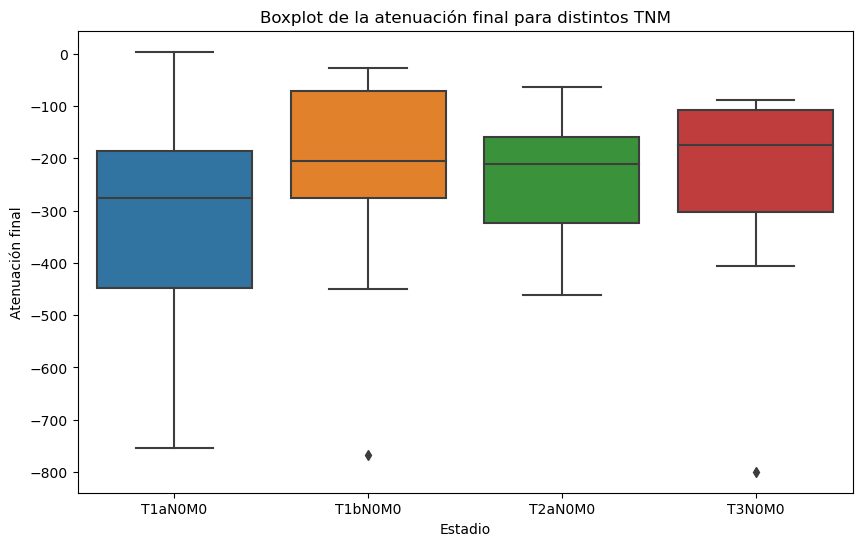

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='TNM', y='ImageMean3', data=malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])], order=['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])
plt.title('Boxplot de la atenuación final para distintos TNM')
plt.xlabel('Estadio')
plt.ylabel('Atenuación final')
#ax.set_ylim(-2, 4)
plt.show()

In [ ]:
resultados_factor_im3_TNM = mann_whitney_test(malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])], 'TNM', 'ImageMean3')
resultados_factor_im3_TNM

{'T2aN0M0 vs T3N0M0': {0.7732396602365642},
 'T2aN0M0 vs T1aN0M0': {0.20619394971071447},
 'T2aN0M0 vs T1bN0M0': {0.4848641211897319},
 'T3N0M0 vs T1aN0M0': {0.2660118976289567},
 'T3N0M0 vs T1bN0M0': {0.9764468483461617},
 'T1aN0M0 vs T1bN0M0': {0.028391339299425472}}

#### Comparación entre T y N

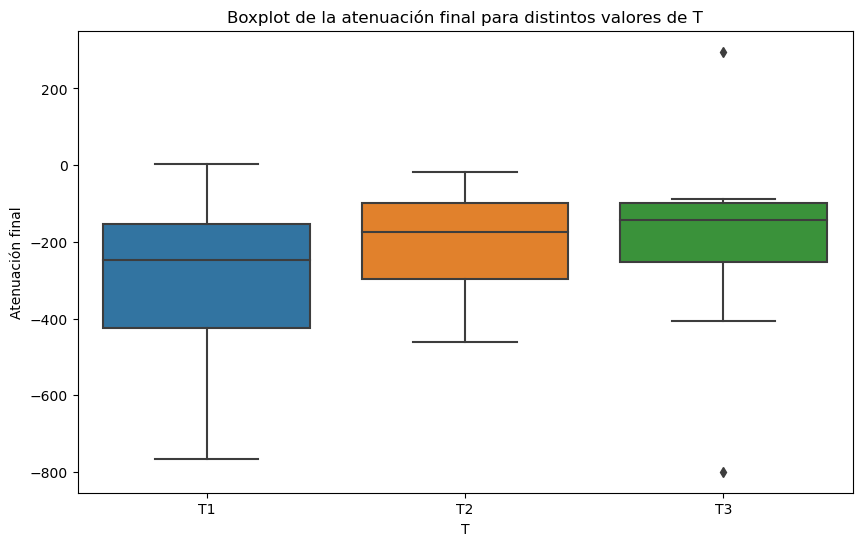

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='T', y='ImageMean3', data=TNM[TNM['T'].isin(['T1', 'T2', 'T3'])],order=['T1', 'T2', 'T3'])
plt.title('Boxplot de la atenuación final para distintos valores de T')
plt.xlabel('T')
plt.ylabel('Atenuación final')
#ax.set_ylim(-7, 10)
plt.show()

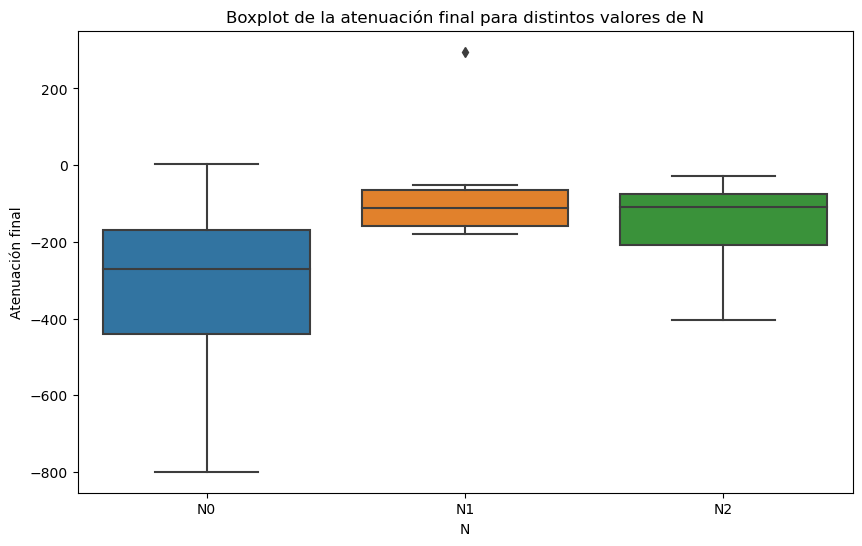

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='N', y='ImageMean3', data=TNM[TNM['N'].isin(['N0', 'N2', 'N1'])],order=['N0', 'N1', 'N2'])
plt.title('Boxplot de la atenuación final para distintos valores de N')
plt.xlabel('N')
plt.ylabel('Atenuación final')
#ax.set_ylim(-7, 10)
plt.show()

In [ ]:
# Test de Mann-Whitney para la variable "BETA"
resultados_im3_T = mann_whitney_test(TNM[TNM['T'].isin(['T1', 'T2', 'T3'])], 'T', 'ImageMean3')
# Test de Mann-Whitney para la variable "BETA"
resultados_im3_N = mann_whitney_test(TNM[TNM['N'].isin(['N0', 'N2', 'N1'])], 'N', 'ImageMean3')


#print("\nResultados para 'ImageMean1':")
#for comparacion, resultados in resultados_imagemean1.items():
    #print(f"Comparación: {comparacion}, Estadístico: {resultados['estadistico']}, p-valor: {resultados['p_valor']}")

print(resultados_im3_T)
print(resultados_im3_N)
#resultados_imagemean1

{'T1 vs T2': {0.03712483198562099}, 'T1 vs T3': {0.18092848309632048}, 'T2 vs T3': {0.9350223232145431}}
{'N1 vs N0': {0.0016010143152226826}, 'N1 vs N2': {0.5961538461538461}, 'N0 vs N2': {0.01094440884591829}}


### Atenuación final-Anatomía

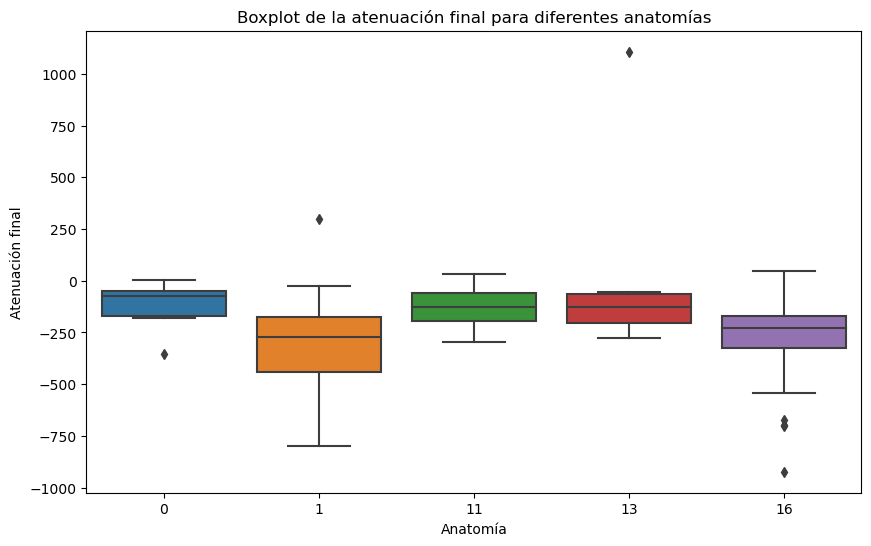

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='COD_AP', y='ImageMean3', data=datos.loc[datos['COD_AP'].isin([1, 16, 11, 0,13])])
plt.title('Boxplot de la atenuación final para diferentes anatomías')
plt.xlabel('Anatomía')
plt.ylabel('Atenuación final')
#ax.set_ylim(-10, 10)
plt.show()

In [ ]:
# Test de Mann-Whitney para la variable "BETA"
resultados_im3_COD_AP = mann_whitney_test(datos.loc[datos['COD_AP'].isin([1, 16, 11, 0,13])], 'COD_AP', 'ImageMean3')
resultados_im3_COD_AP

{'1 vs 11': {3.2227259064963924e-07},
 '1 vs 0': {0.00016558387782181528},
 '1 vs 13': {0.0022523021735730156},
 '1 vs 16': {0.2631690408733225},
 '11 vs 0': {0.2962009226261202},
 '11 vs 13': {0.9626293304266993},
 '11 vs 16': {2.317231559130698e-05},
 '0 vs 13': {0.5035147104262714},
 '0 vs 16': {0.0007612319837260887},
 '13 vs 16': {0.0041380154934650025}}

## Atenuación media

### ImageMean Media- Malignidad

In [ ]:
import pandas as pd
from scipy.stats import kruskal

# Suponemos que el DataFrame 'malignos' ya está cargado
# malignos = pd.read_excel('malignos.xlsx')

# Filtrar los datos para incluir solo los valores I, II y III en la columna 'Estadio'
malignos_filtrados = malignos[malignos['Estadio'].isin(['I', 'II', 'III'])]

# Agrupar los valores de 'ImageMean1' según el 'Estadio' y eliminar NaN
grupo_I = malignos_filtrados[malignos_filtrados['Estadio'] == 'I']['MeanAt'].dropna()
grupo_II = malignos_filtrados[malignos_filtrados['Estadio'] == 'II']['MeanAt'].dropna()
grupo_III = malignos_filtrados[malignos_filtrados['Estadio'] == 'III']['MeanAt'].dropna()

# Verificar las estadísticas descriptivas de cada grupo
print("Estadísticas descriptivas del grupo I:")
print(grupo_I.describe())

print("\nEstadísticas descriptivas del grupo II:")
print(grupo_II.describe())

print("\nEstadísticas descriptivas del grupo III:")
print(grupo_III.describe())

# Verificar que no hay valores infinitos
print("\nVerificación de valores infinitos:")
print(f"Grupo I - Infinitos: {np.isinf(grupo_I).sum()}")
print(f"Grupo II - Infinitos: {np.isinf(grupo_II).sum()}")
print(f"Grupo III - Infinitos: {np.isinf(grupo_III).sum()}")

# Realizar el test de Kruskal-Wallis
stat, p_value = kruskal(grupo_I, grupo_II, grupo_III)

# Mostrar los resultados
print(f"\nEstadístico de Kruskal-Wallis: {stat}")
print(f"Valor p: {p_value}")

# Interpretación del resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: No hay una diferencia significativa entre los grupos.")


Estadísticas descriptivas del grupo I:
count    121.000000
mean    -333.790359
std      176.708872
min     -747.962667
25%     -483.592667
50%     -305.458000
75%     -201.549667
max       10.990567
Name: MeanAt, dtype: float64

Estadísticas descriptivas del grupo II:
count     15.000000
mean    -234.233439
std      194.638839
min     -840.292667
25%     -253.561500
50%     -141.562333
75%     -127.859933
max      -83.436467
Name: MeanAt, dtype: float64

Estadísticas descriptivas del grupo III:
count     17.000000
mean    -205.257635
std      203.248309
min     -544.690333
25%     -286.672900
50%     -211.863000
75%     -126.470033
max      385.133667
Name: MeanAt, dtype: float64

Verificación de valores infinitos:
Grupo I - Infinitos: 0
Grupo II - Infinitos: 0
Grupo III - Infinitos: 0

Estadístico de Kruskal-Wallis: 11.40029436090515
Valor p: 0.0033454730329994594
Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos.


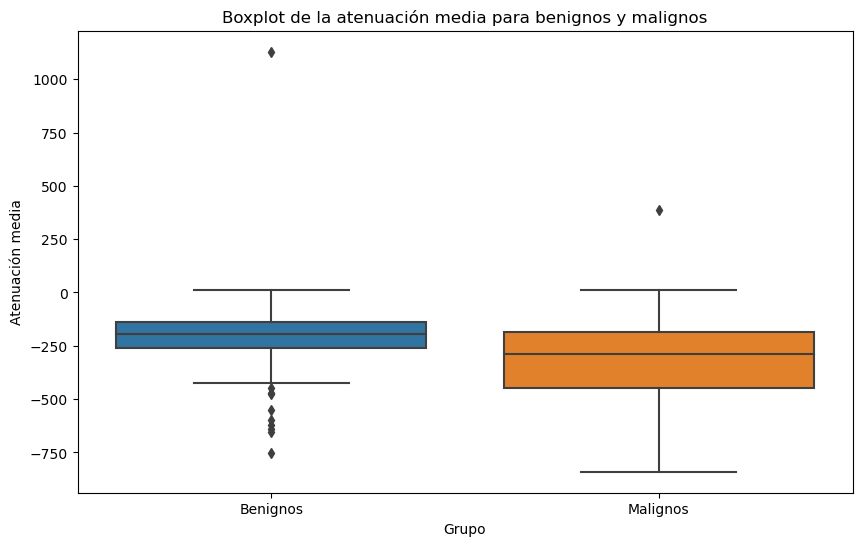

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='MALIGNO', y='MeanAt', data=datos)
plt.title('Boxplot de la atenuación media para benignos y malignos')
plt.xlabel('Grupo')
plt.ylabel('Atenuación media')
ax.set_xticklabels(['Benignos' if label == False else 'Malignos' for label in ax.get_xticks()])
# ax.set_ylim(-7, 10)
plt.show()

In [ ]:
# Test de Mann-Whitney para la variable "MeanAt"
resultados_MeanAt = mannwhitneyu(benignos['MeanAt'], malignos['MeanAt'])
resultados_MeanAt

MannwhitneyuResult(statistic=9748.0, pvalue=6.901092858799599e-06)

Diferencia significativa.

### ImageMeanMedia-Estadio

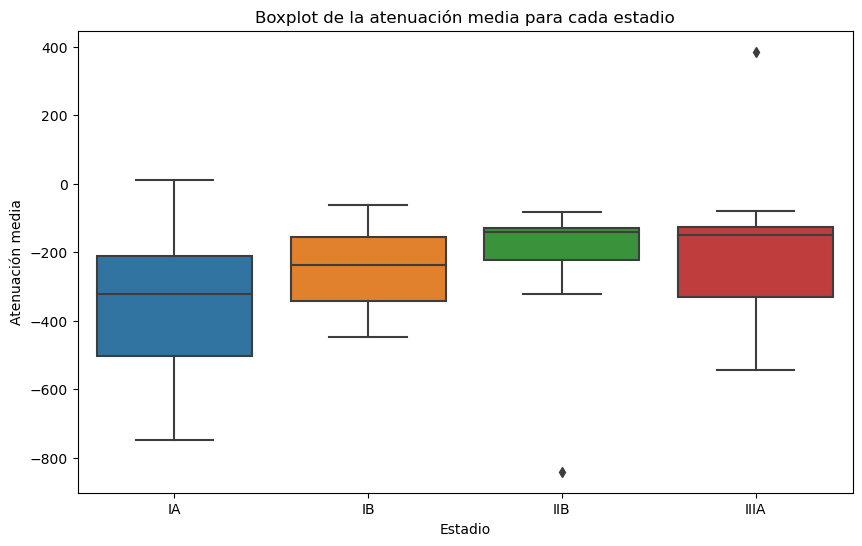

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='Estadio', y='MeanAt', data=malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], order=['IA', 'IB', 'IIB', 'IIIA'])
plt.title('Boxplot de la atenuación media para cada estadio')
plt.xlabel('Estadio')
plt.ylabel('Atenuación media')
# ax.set_ylim(-2, 4)
plt.show()

In [ ]:
resultados_media_Estadio = mann_whitney_test(malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], 'Estadio', 'MeanAt')
resultados_media_Estadio

{'IB vs IIB': {0.1826826235708774},
 'IB vs IA': {0.04967259548374093},
 'IB vs IIIA': {0.5189823900781524},
 'IIB vs IA': {0.011483552679890086},
 'IIB vs IIIA': {0.7163811613729257},
 'IA vs IIIA': {0.015391412762346797}}

### TNM-ImageMean media

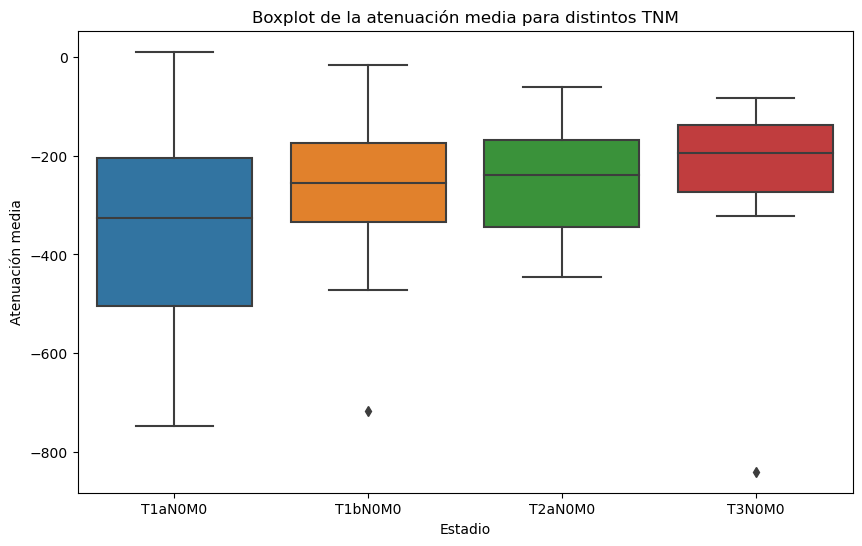

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='TNM', y='MeanAt', data=malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])], order=['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])
plt.title('Boxplot de la atenuación media para distintos TNM')
plt.xlabel('Estadio')
plt.ylabel('Atenuación media')
#ax.set_ylim(-2, 4)
plt.show()

In [ ]:
resultados_media_TNM = mann_whitney_test(malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])], 'TNM', 'MeanAt')
resultados_media_TNM

{'T2aN0M0 vs T3N0M0': {0.535841867111217},
 'T2aN0M0 vs T1aN0M0': {0.10019187069370424},
 'T2aN0M0 vs T1bN0M0': {0.9157145051522164},
 'T3N0M0 vs T1aN0M0': {0.1603733196512246},
 'T3N0M0 vs T1bN0M0': {0.5339005616808821},
 'T1aN0M0 vs T1bN0M0': {0.10949595213985187}}

#### Comparación entre T y N

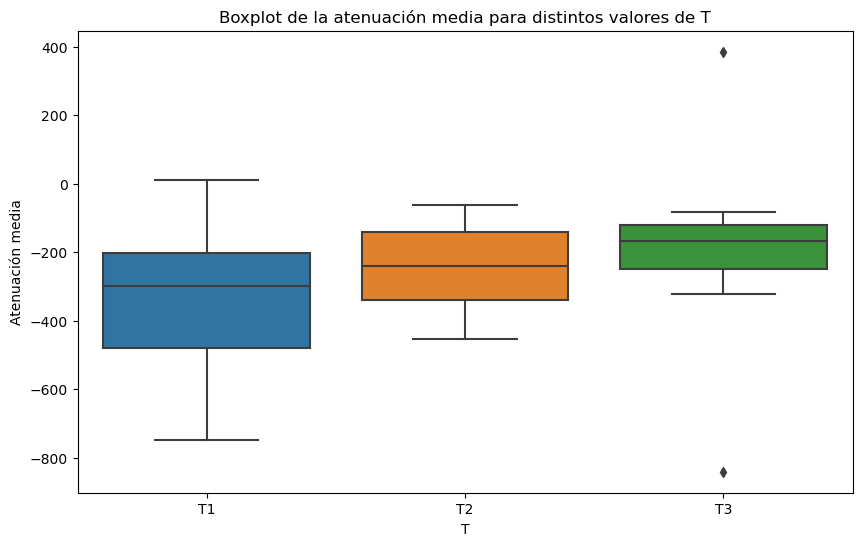

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='T', y='MeanAt', data=TNM[TNM['T'].isin(['T1', 'T2', 'T3'])],order=['T1', 'T2', 'T3'])
plt.title('Boxplot de la atenuación media para distintos valores de T')
plt.xlabel('T')
plt.ylabel('Atenuación media')
#ax.set_ylim(-7, 10)
plt.show()

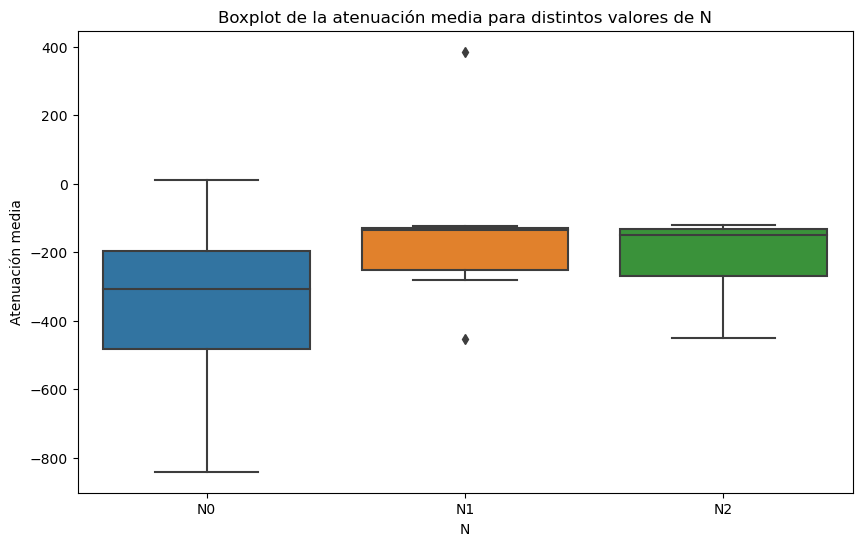

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='N', y='MeanAt', data=TNM[TNM['N'].isin(['N0', 'N2', 'N1'])],order=['N0', 'N1', 'N2'])
plt.title('Boxplot de la atenuación media para distintos valores de N')
plt.xlabel('N')
plt.ylabel('Atenuación media')
#ax.set_ylim(-7, 10)
plt.show()

In [ ]:
# Test de Mann-Whitney para la variable "BETA"
resultados_media_T = mann_whitney_test(TNM[TNM['T'].isin(['T1', 'T2', 'T3'])], 'T', 'MeanAt')
# Test de Mann-Whitney para la variable "BETA"
resultados_media_N = mann_whitney_test(TNM[TNM['N'].isin(['N0', 'N2', 'N1'])], 'N', 'MeanAt')


#print("\nResultados para 'ImageMean1':")
#for comparacion, resultados in resultados_imagemean1.items():
    #print(f"Comparación: {comparacion}, Estadístico: {resultados['estadistico']}, p-valor: {resultados['p_valor']}")

print(resultados_media_T)
print(resultados_media_N)

{'T1 vs T2': {0.06129168042631612}, 'T1 vs T3': {0.0694346345006448}, 'T2 vs T3': {0.3971042230081132}}
{'N1 vs N0': {0.03822987596424759}, 'N1 vs N2': {0.5961538461538461}, 'N0 vs N2': {0.03252205518924885}}


### Anatomía-ImageMean media

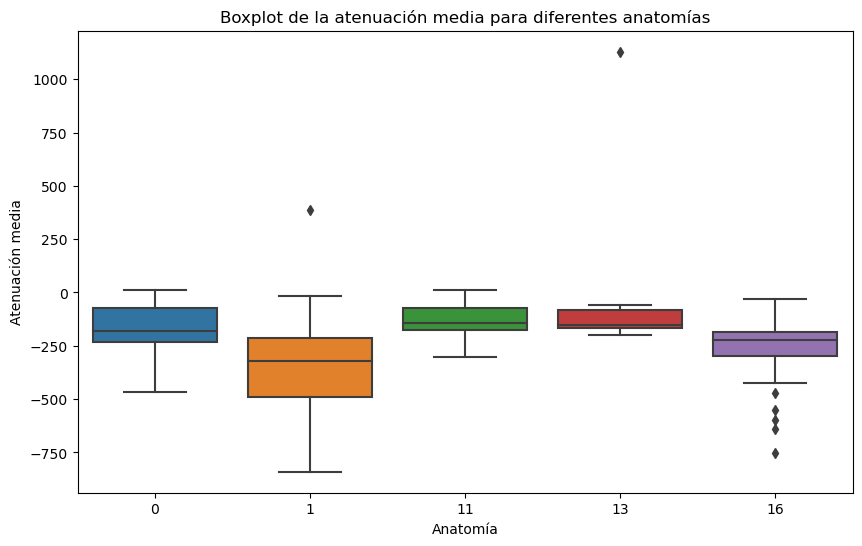

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='COD_AP', y='MeanAt', data=datos.loc[datos['COD_AP'].isin([1, 16, 11, 0,13])])
plt.title('Boxplot de la atenuación media para diferentes anatomías')
plt.xlabel('Anatomía')
plt.ylabel('Atenuación media')
#ax.set_ylim(-10, 10)
plt.show()

In [ ]:
# Test de Mann-Whitney para la variable "BETA"
resultados_media_COD_AP = mann_whitney_test(datos.loc[datos['COD_AP'].isin([1, 16, 11, 0,13])], 'COD_AP', 'MeanAt')
resultados_media_COD_AP

{'1 vs 11': {2.4080706895214602e-09},
 '1 vs 0': {0.0014319191567165501},
 '1 vs 13': {4.718890196790236e-05},
 '1 vs 16': {0.007807901895360441},
 '11 vs 0': {0.66961697165778},
 '11 vs 13': {0.742926569900466},
 '11 vs 16': {5.6660492364802314e-05},
 '0 vs 13': {0.4596715909585638},
 '0 vs 16': {0.03621728181216284},
 '13 vs 16': {0.000564965902731101}}

## Tasa de cambio

### Tasa de cambio-Malignidad

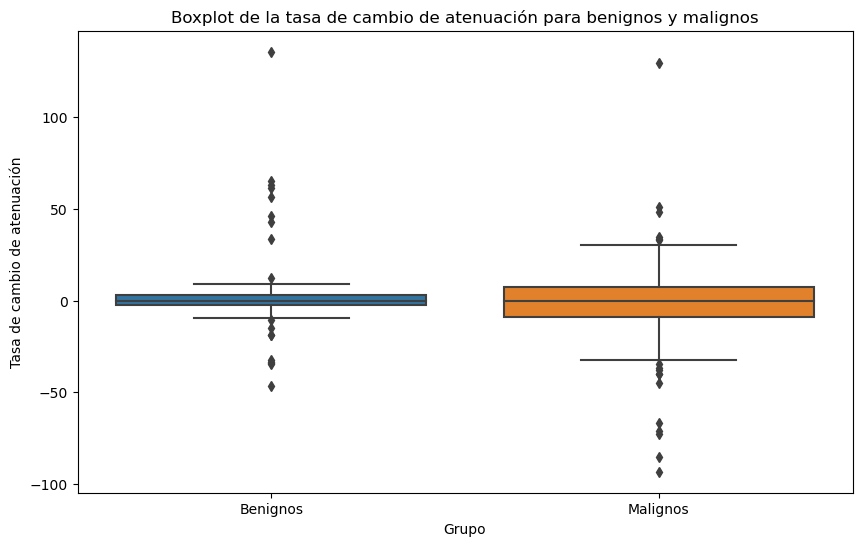

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='MALIGNO', y='tcambio', data=datos)
plt.title('Boxplot de la tasa de cambio de atenuación para benignos y malignos')
plt.xlabel('Grupo')
plt.ylabel('Tasa de cambio de atenuación')
ax.set_xticklabels(['Benignos' if label == False else 'Malignos' for label in ax.get_xticks()])
#ax.set_ylim(-0.1, 0.1)
plt.show()

In [ ]:
# Test de Mann-Whitney para la variable "tcambio"
resultados_tcambio = mannwhitneyu(benignos['tcambio'], malignos['tcambio'])
resultados_tcambio

MannwhitneyuResult(statistic=7562.0, pvalue=0.5945327080220213)

### Tasa de cambio-Estadio

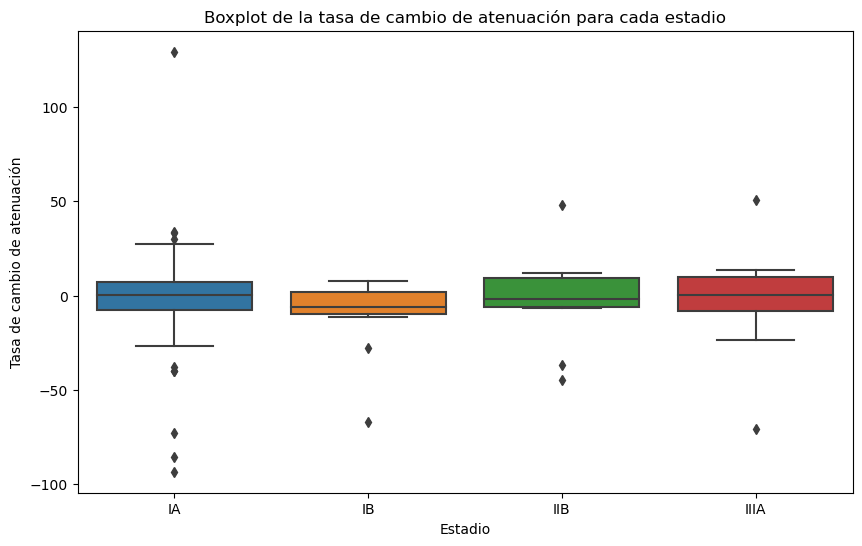

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='Estadio', y='tcambio', data=malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], order=['IA', 'IB', 'IIB', 'IIIA'])
plt.title('Boxplot de la tasa de cambio de atenuación para cada estadio')
plt.xlabel('Estadio')
plt.ylabel('Tasa de cambio de atenuación')
# ax.set_ylim(-2, 4)
plt.show()

In [ ]:
resultados_tc_Estadio = mann_whitney_test(malignos.loc[malignos['Estadio'].isin(['IA', 'IB', 'IIB', 'IIIA'])], 'Estadio', 'tcambio')
resultados_tc_Estadio

{'IB vs IIB': {0.2709861613045861},
 'IB vs IA': {0.13736357120342726},
 'IB vs IIIA': {0.2494716685110525},
 'IIB vs IA': {0.9597551553900631},
 'IIB vs IIIA': {0.7952497535349383},
 'IA vs IIIA': {0.783793497379375}}

### Tasa de cambio-TNM

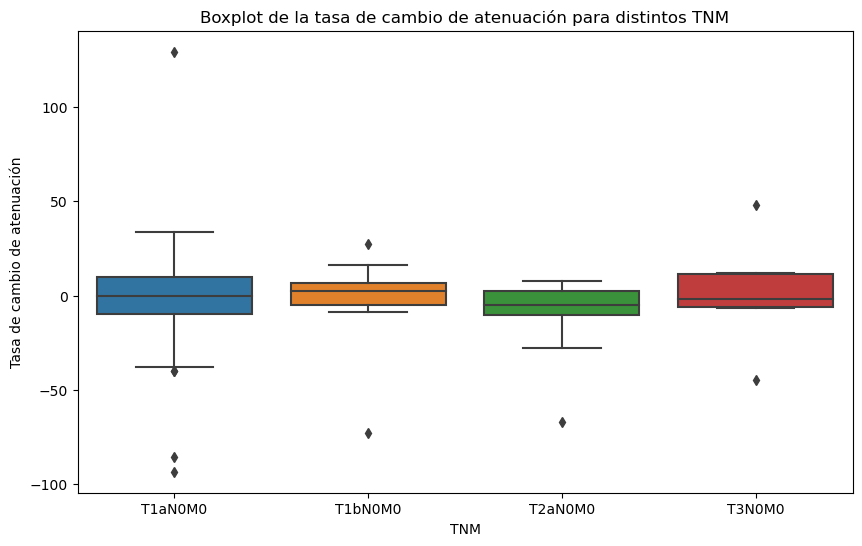

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='TNM', y='tcambio', data=malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])], order=['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])
plt.title('Boxplot de la tasa de cambio de atenuación para distintos TNM')
plt.xlabel('TNM')
plt.ylabel('Tasa de cambio de atenuación')
#ax.set_ylim(-2, 4)
plt.show()

In [ ]:
resultados_tc_TNM = mann_whitney_test(malignos.loc[malignos['TNM'].isin(['T1aN0M0', 'T1bN0M0', 'T2aN0M0', 'T3N0M0'])], 'TNM', 'tcambio')
resultados_tc_TNM

{'T2aN0M0 vs T3N0M0': {0.2991188378185282},
 'T2aN0M0 vs T1aN0M0': {0.2282986386290523},
 'T2aN0M0 vs T1bN0M0': {0.07199203602952622},
 'T3N0M0 vs T1aN0M0': {0.8449866362560016},
 'T3N0M0 vs T1bN0M0': {0.9764468483461617},
 'T1aN0M0 vs T1bN0M0': {0.4669300688248774}}

#### Comparación entre T y N

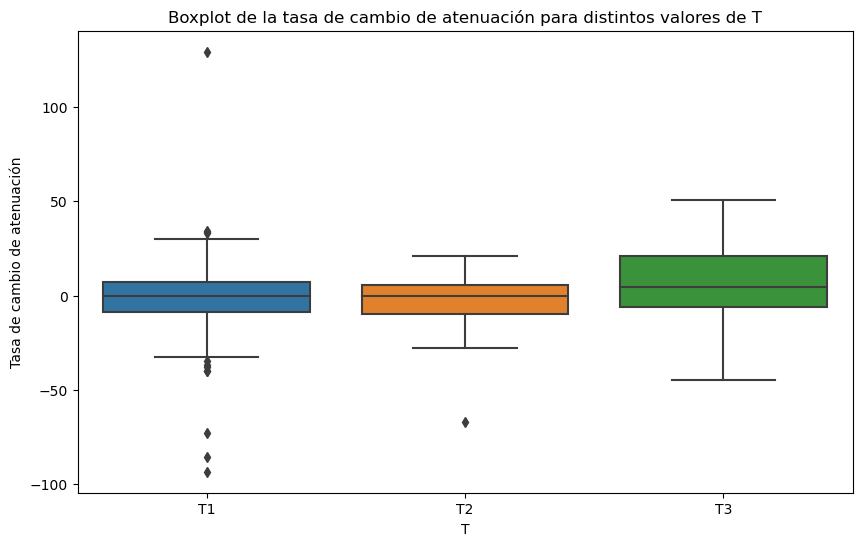

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='T', y='tcambio', data=TNM[TNM['T'].isin(['T1', 'T2', 'T3'])],order=['T1', 'T2', 'T3'])
plt.title('Boxplot de la tasa de cambio de atenuación para distintos valores de T')
plt.xlabel('T')
plt.ylabel('Tasa de cambio de atenuación')
#ax.set_ylim(-0.1, 0.10)
plt.show()

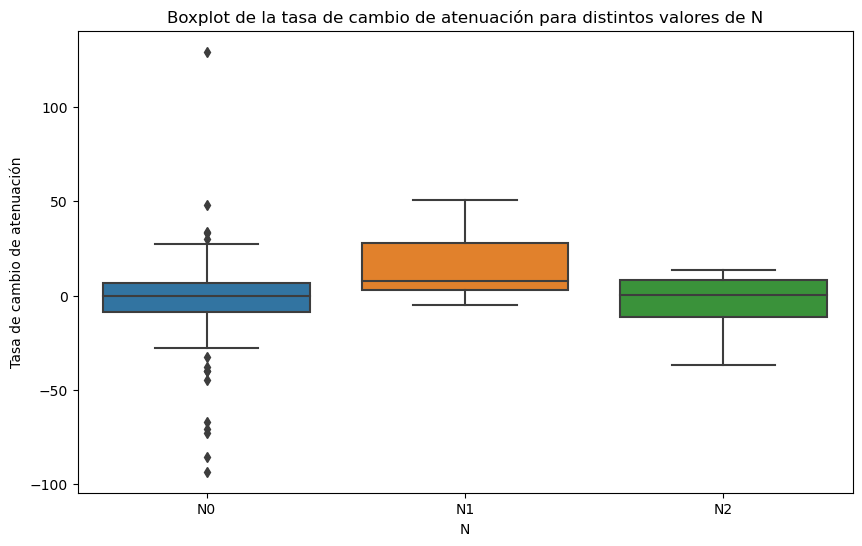

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='N', y='tcambio', data=TNM[TNM['N'].isin(['N0', 'N2', 'N1'])],order=['N0', 'N1', 'N2'])
plt.title('Boxplot de la tasa de cambio de atenuación para distintos valores de N')
plt.xlabel('N')
plt.ylabel('Tasa de cambio de atenuación')
#ax.set_ylim(-7, 10)
plt.show()

In [ ]:
# Test de Mann-Whitney para la variable "BETA"
resultados_tc_T = mann_whitney_test(TNM[TNM['T'].isin(['T1', 'T2', 'T3'])], 'T', 'tcambio')
# Test de Mann-Whitney para la variable "BETA"
resultados_tc_N = mann_whitney_test(TNM[TNM['N'].isin(['N0', 'N2', 'N1'])], 'N', 'tcambio')


#print("\nResultados para 'ImageMean1':")
#for comparacion, resultados in resultados_imagemean1.items():
    #print(f"Comparación: {comparacion}, Estadístico: {resultados['estadistico']}, p-valor: {resultados['p_valor']}")

print(resultados_tc_T)
print(resultados_tc_N)

{'T1 vs T2': {0.8336986476685821}, 'T1 vs T3': {0.40932124163274397}, 'T2 vs T3': {0.36701092957385867}}
{'N1 vs N0': {0.014725033265599945}, 'N1 vs N2': {0.10419808949220714}, 'N0 vs N2': {0.9855201075203557}}


### Tasa de cambio-Anatomía

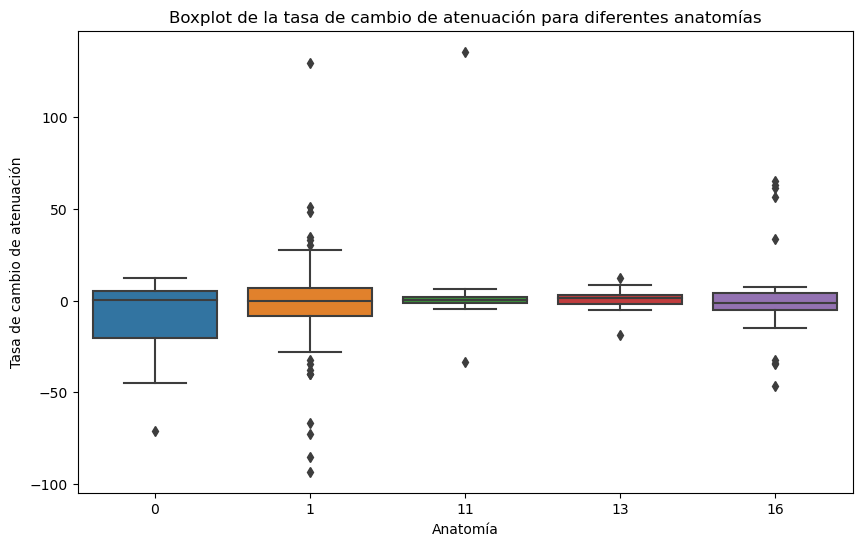

In [ ]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='COD_AP', y='tcambio', data=datos.loc[datos['COD_AP'].isin([1, 16, 11, 0,13])])
plt.title('Boxplot de la tasa de cambio de atenuación para diferentes anatomías')
plt.xlabel('Anatomía')
plt.ylabel('Tasa de cambio de atenuación')
#ax.set_ylim(-10, 10)
plt.show()

In [ ]:
# Test de Mann-Whitney para la variable "BETA"
resultados_tc_COD_AP = mann_whitney_test(datos.loc[datos['COD_AP'].isin([1, 16, 11, 0,13])], 'COD_AP', 'tcambio')
resultados_tc_COD_AP

{'1 vs 11': {0.6527506630027093},
 '1 vs 0': {0.5580584646516835},
 '1 vs 13': {0.6706548018637921},
 '1 vs 16': {0.9518824283355366},
 '11 vs 0': {0.964795405846714},
 '11 vs 13': {0.5018720166236073},
 '11 vs 16': {0.34602943109117723},
 '0 vs 13': {0.5035147104262714},
 '0 vs 16': {0.9039884802366799},
 '13 vs 16': {0.5081520110184716}}